# Group 30: Phase 0 - Cats vs Dogs Detector (CaDoD)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Team Neuro Members:
* Bhargav Sai Gogineni

  email : bgoginen@iu.edu

* Harini Mohanasundaram

  email : harmohan@iu.edu

* Tarika Sadey

  email : tsadey@iu.edu

* Suraj Gupta Gudla

  email : surgudla@iu.edu
  
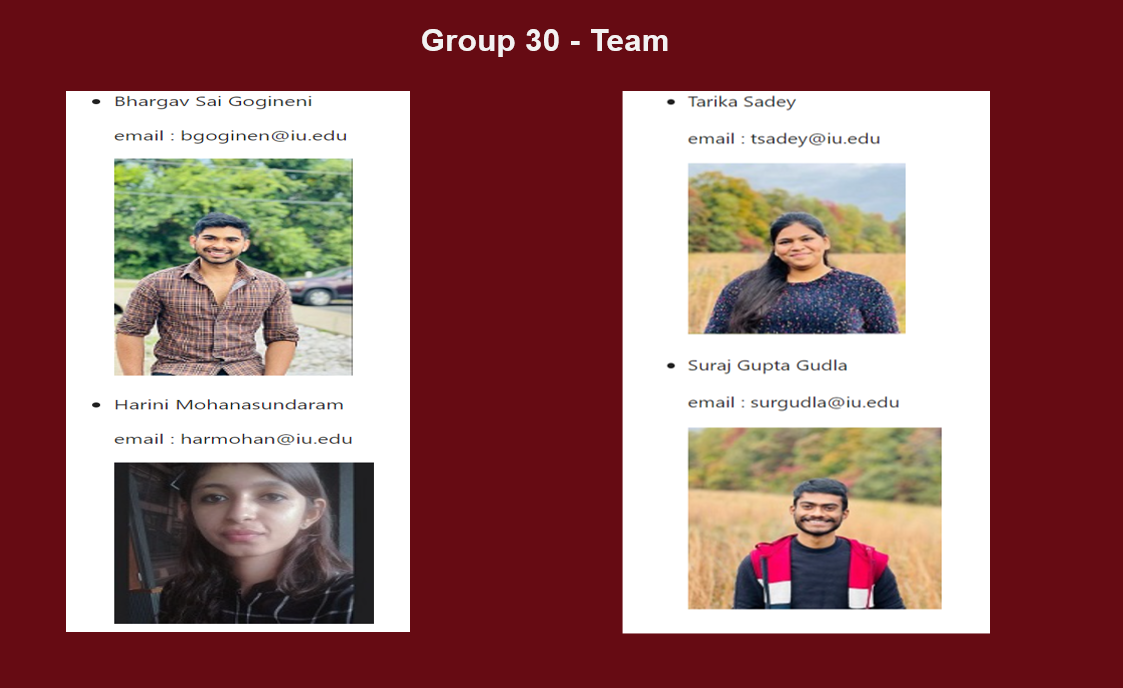

# Project Abstract

One of the biggest challenges in the field of computer vision is Image Classification and detection which has varied applications starting from the field of medicine, space object detection and so on. The aim of this project is to perform image classification analysis on a dataset to differentiate between cat and dog images using classification and regression models. We first preprocess the images from the image catalogue using different function metrics and using the RGB intensity value arrays we feed them into classifiers to predict labels(cat/dog) and bounding boxes for which we will implement baseline model Logistic Regression as our classifier and optimize using stochastic gradient descent at an adaptive learning rate, homegrown logistic regression and linear regression to predict class, bounding boxes and loss function attributes using both sklearn and pytorch. We then plan to extend our model training by implementing Convolutional Neural Network(CNN) model for single object detection using Pytorch and use different performance metrics such as RMSE, MSE and accuracy to measure our model performance.

## Project Description:

Our aim for this project is to build object detection pipelines using Python, OpenCV, SKLearn, and  PyTorch to detect cat and dog images.We import the image catalogue data, perform Exploratory data analysis on it, derrive some metrics and baseline models on the data.In order to create a detector, we will first have to preprocess the images to be all of the same shapes, take their RGB intensity values and flatten them from a 3D array to 2D. Then we will feed this array into a linear classifier and a linear regressor to predict labels and bounding boxes.

Build an SKLearn model for image classification and another model for regression
Implement a Homegrown Logistic Regression model. Extend the loss function from CXE to CXE + MSE
Build a baseline pipeline in PyTorch to object classification and object localization

Build a convolutional neural network network for single object classifier and detector.


# Data Description:
The data set consists of about 12,966 RGB images of cats and dogs with varying shapes and aspect ratios. The image bounding box coordinates are stored in a .csv file which contain image description, box coordinate descriptions along with some required attributes. We define some of the data attributes as below:

* ImageID :-  the image id the box lives in	
* LabelName: this defines the class(cat/dog) of the image
* XMin, XMax, YMin, YMax: coordinates of the box, in normalized image coordinates.
* Source: indicates how the box was made: (xclick/activemil) where manually drawn boxes are generated from xclick and boxes produced from an human enhanced version method are represented as activemil.
* Confidence: a resource dummy value always equal to 1
* IsOccluded: (0 or 1) describes whether an object is being obstructed by another object in the image.
* IsTruncated: Indicates that the object extends beyond the boundary of the image.
* IsGroupOf: Indicates that the box spans a group of objects (e.g., a bed of flowers or a crowd of people). We     asked annotators to use this tag for cases with more than 5 instances which are heavily occluding each other and are physically touching.
* IsDepiction: (0 or 1) indicates whether an object in the image is real or a depicted picture
* IsInside: Indicates a picture taken from the inside of the object (e.g., a car interior or inside of a building). For each of them, value 1 indicates present, 0 not present, and -1 unknown.	
* XClick1X, XClick2X, XClick3X, XClick4X, XClick1Y, XClick2Y, XClick3Y, XClick4Y: normalized image coordinates of the four extreme points of the object that produced the box.

In [2]:
from collections import Counter
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
import tarfile
from tqdm.notebook import tqdm
import warnings

# Import Data

### Unarchive data

In [3]:
def extract_tar(file, path):
    """
    function to extract tar.gz files to specified location
    
    Args:
        file (str): path where the file is located
        path (str): path where you want to extract
    """
    with tarfile.open(file) as tar:
        files_extracted = 0
        for member in tqdm(tar.getmembers()):
            if os.path.isfile(path + member.name[1:]):
                continue
            else:
                tar.extract(member, path)
                files_extracted += 1
        tar.close()
        if files_extracted < 3:
            print('Files already exist')

In [4]:
path = 'images/'

extract_tar('/content/drive/MyDrive/AML_Project/cadod.tar.gz', path)

  0%|          | 0/25936 [00:00<?, ?it/s]

### Load bounding box meta data

In [5]:
df = pd.read_csv('/content/drive/MyDrive/AML_Project/cadod.csv')

In [6]:
df.head()

ImageID  Source  LabelName  ...  XClick2Y  XClick3Y  XClick4Y
0  0000b9fcba019d36  xclick  /m/0bt9lr  ...  0.506667  0.998333  0.661667
1  0000cb13febe0138  xclick  /m/0bt9lr  ...  0.410882  0.999062  0.999062
2  0005a9520eb22c19  xclick  /m/0bt9lr  ...  0.226296  0.998736  0.305942
3  0006303f02219b07  xclick  /m/0bt9lr  ...  0.375294  0.720000  0.998824
4  00064d23bf997652  xclick  /m/0bt9lr  ...  0.370000  0.424286  0.694286

[5 rows x 21 columns]

In [7]:
df.columns

Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside', 'XClick1X', 'XClick2X', 'XClick3X', 'XClick4X', 'XClick1Y',
       'XClick2Y', 'XClick3Y', 'XClick4Y'],
      dtype='object')

# Exploratory Data Analysis

## Statistics

In [8]:
print(f"There are a total of {len(glob.glob1(path, '*.jpg'))} images")

There are a total of 12966 images


In [9]:
print(f"The total size is {os.path.getsize(path)/1000} MB")

The total size is 1101.824 MB


In [10]:
df.shape

(12966, 21)

Replace `LabelName` with human readable labels

In [11]:
df.LabelName.replace({'/m/01yrx':'cat', '/m/0bt9lr':'dog'}, inplace=True)

In [12]:
df.LabelName.value_counts()

dog    6855
cat    6111
Name: LabelName, dtype: int64

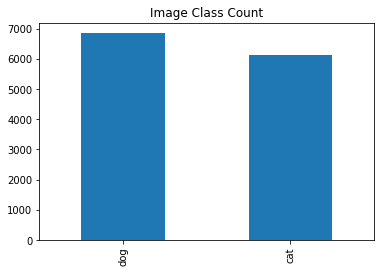

In [13]:
df.LabelName.value_counts().plot(kind='bar')
plt.title('Image Class Count')
plt.show()

In [14]:
df.describe()

Confidence          XMin  ...      XClick3Y      XClick4Y
count     12966.0  12966.000000  ...  12966.000000  12966.000000
mean          1.0      0.099437  ...      0.641749      0.582910
std           0.0      0.113023  ...      0.448054      0.403454
min           1.0      0.000000  ...     -1.000000     -1.000000
25%           1.0      0.000000  ...      0.405817      0.400000
50%           1.0      0.061250  ...      0.825000      0.646667
75%           1.0      0.167500  ...      0.998042      0.882500
max           1.0      0.592500  ...      1.000000      0.999375

[8 rows x 18 columns]

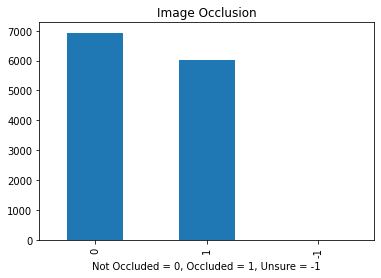

Counter({0: 6934, 1: 6029, -1: 3})


In [15]:
df.IsOccluded.value_counts().plot(kind='bar')
plt.title('Image Occlusion')
plt.xlabel("Not Occluded = 0, Occluded = 1, Unsure = -1")
plt.show()

count_unique = Counter(df['IsOccluded'])
print(count_unique)

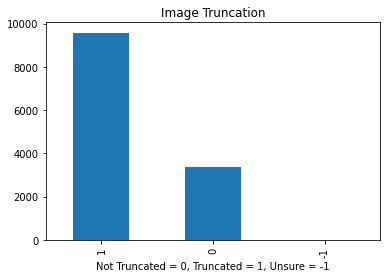

Counter({1: 9578, 0: 3385, -1: 3})


In [16]:
df.IsTruncated.value_counts().plot(kind='bar')
plt.title('Image Truncation')
plt.xlabel("Not Truncated = 0, Truncated = 1, Unsure = -1")
plt.show()

count_unique = Counter(df['IsTruncated'])
print(count_unique)

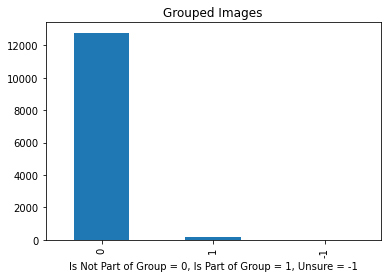

Counter({0: 12783, 1: 180, -1: 3})


In [17]:
df.IsGroupOf.value_counts().plot(kind='bar')
plt.title('Grouped Images')
plt.xlabel("Is Not Part of Group = 0, Is Part of Group = 1, Unsure = -1")
plt.show()

count_unique = Counter(df['IsGroupOf'])
print(count_unique)

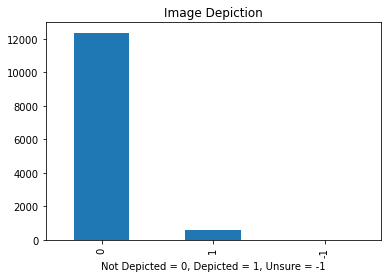

Counter({0: 12371, 1: 592, -1: 3})


In [18]:
df.IsDepiction.value_counts().plot(kind='bar')
plt.title('Image Depiction')
plt.xlabel("Not Depicted = 0, Depicted = 1, Unsure = -1")
plt.show()

count_unique = Counter(df['IsDepiction'])
print(count_unique)

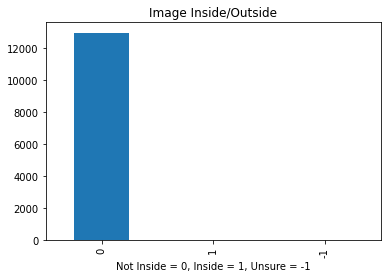

Counter({0: 12945, 1: 18, -1: 3})


In [19]:
df.IsInside.value_counts().plot(kind='bar')
plt.title('Image Inside/Outside')
plt.xlabel("Not Inside = 0, Inside = 1, Unsure = -1")
plt.show()

count_unique = Counter(df['IsInside'])
print(count_unique)

## Sample of Images

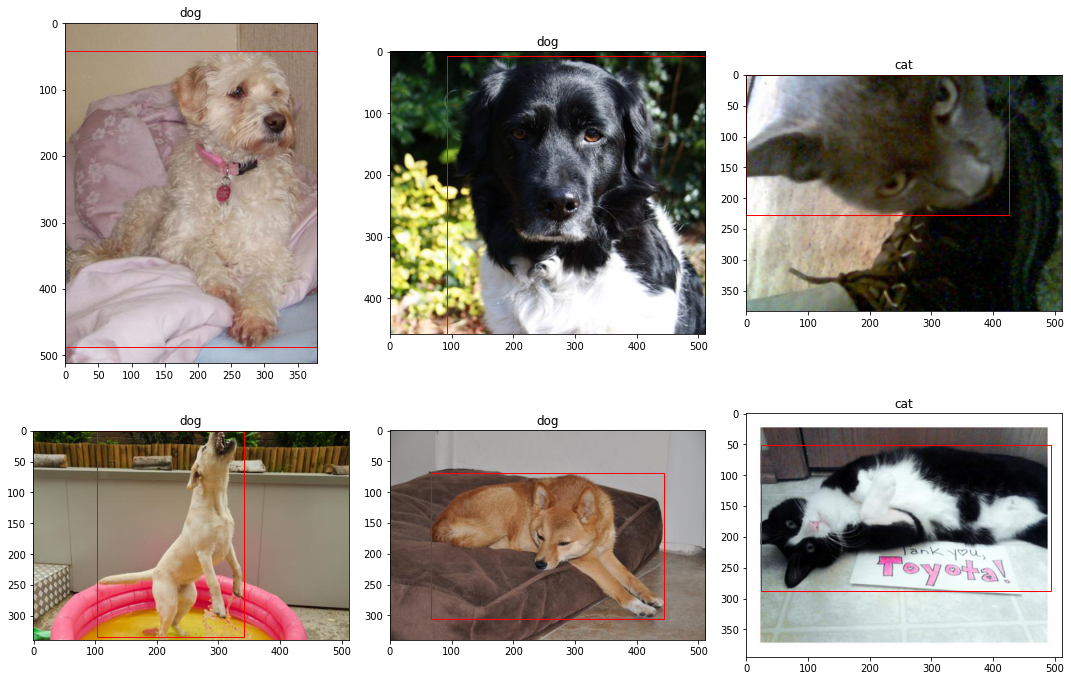

In [20]:
# plot random 6 images
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False,figsize=(15,10))
ax = ax.flatten()

for i,j in enumerate(np.random.choice(df.shape[0], size=6, replace=False)):
    img = mpimg.imread(path + df.ImageID.values[j] + '.jpg')
    h, w = img.shape[:2]
    coords = df.iloc[j,4:8]
    ax[i].imshow(img)
    ax[i].set_title(df.LabelName[j])
    ax[i].add_patch(plt.Rectangle((coords[0]*w, coords[2]*h), 
                                  coords[1]*w-coords[0]*w, coords[3]*h-coords[2]*h, 
                                  edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()

## Image shapes and sizes

Go through all images and record the shape of the image in pixels and the memory size

In [21]:
img_shape = []
img_size = np.zeros((df.shape[0], 1))

for i,f in enumerate(tqdm(glob.glob1(path, '*.jpg'))):
    file = path+'/'+f
    img = Image.open(file)
    img_shape.append(f"{img.size[0]}x{img.size[1]}")
    img_size[i] += os.path.getsize(file)

  0%|          | 0/12966 [00:00<?, ?it/s]

Count all the different image shapes

In [22]:
img_shape_count = Counter(img_shape)

In [23]:
# create a dataframe for image shapes
img_df = pd.DataFrame(set(img_shape_count.items()), columns=['img_shape','img_count'])

In [24]:
img_df.shape

(594, 2)

In [25]:
img_df.head(5)

img_shape  img_count
0   512x321          5
1   330x512          3
2   512x381         14
3   512x269          2
4   512x397          8

There are a ton of different image shapes. Let's narrow this down by getting a sum of any image shape that has a cout less than 100 and put that in a category called `other`

In [26]:
img_df = img_df.append({'img_shape': 'other','img_count': img_df[img_df.img_count < 100].img_count.sum()}, 
                       ignore_index=True)

Drop all image shapes

In [27]:
img_df = img_df[img_df.img_count >= 100]

Check if the count sum matches the number of images

In [28]:
img_df.img_count.sum() == df.shape[0]

True

Plot

## TODO plot aspect ratio

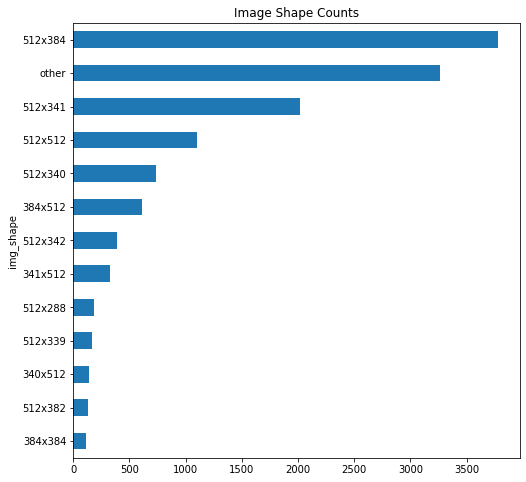

In [29]:
img_df.sort_values('img_count', inplace=True)
img_df.plot(x='img_shape', y='img_count', kind='barh', figsize=(8,8), legend=False)
plt.title('Image Shape Counts')
plt.show()

In [30]:
# convert to megabytes
img_size = img_size / 1000

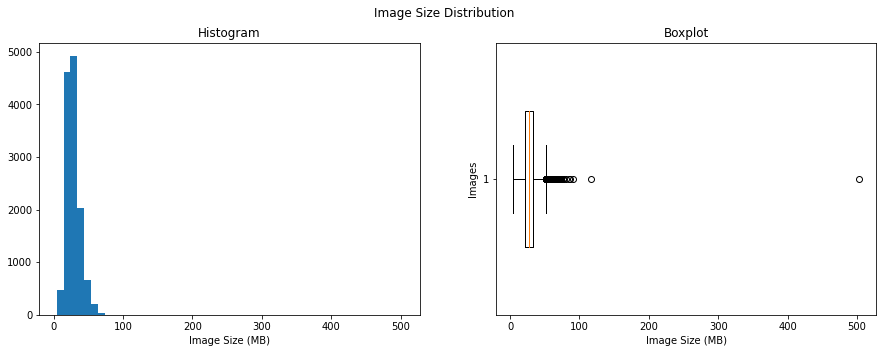

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Image Size Distribution')
ax[0].hist(img_size, bins=50)
ax[0].set_title('Histogram')
ax[0].set_xlabel('Image Size (MB)')
ax[1].boxplot(img_size, vert=False, widths=0.5)
ax[1].set_title('Boxplot')
ax[1].set_xlabel('Image Size (MB)')
ax[1].set_ylabel('Images')
plt.show()

# Preprocess

## Rescale the images

In [32]:
!mkdir -p images/resized

In [33]:
%%time
# resize image and save, convert to numpy

img_arr = np.zeros((df.shape[0],32*32*3)) # initialize np.array

for i, f in enumerate(tqdm(df.ImageID)):
    img = Image.open(path+f+'.jpg')
    img_resized = img.resize((32,32))
    img_resized.save("images/resized/"+f+'.jpg', "JPEG", optimize=True)
    img_arr[i] = np.asarray(img_resized, dtype=np.uint8).flatten()

  0%|          | 0/12966 [00:00<?, ?it/s]

CPU times: user 1min 4s, sys: 2.43 s, total: 1min 7s
Wall time: 1min 6s


In [34]:
df["ImageArray"]=[img for img in img_arr]


In [35]:
df.head()

ImageID  ...                                         ImageArray
0  0000b9fcba019d36  ...  [59.0, 128.0, 182.0, 68.0, 131.0, 184.0, 68.0,...
1  0000cb13febe0138  ...  [89.0, 89.0, 87.0, 93.0, 93.0, 91.0, 140.0, 13...
2  0005a9520eb22c19  ...  [94.0, 100.0, 90.0, 90.0, 96.0, 86.0, 80.0, 85...
3  0006303f02219b07  ...  [132.0, 101.0, 80.0, 149.0, 118.0, 95.0, 161.0...
4  00064d23bf997652  ...  [1.0, 44.0, 8.0, 0.0, 43.0, 8.0, 1.0, 46.0, 11...

[5 rows x 22 columns]

In [36]:
img_arr[0]


array([ 59., 128., 182., ...,  59., 141., 203.])

## Resized and Filtered Images
Plot the resized and filtered images

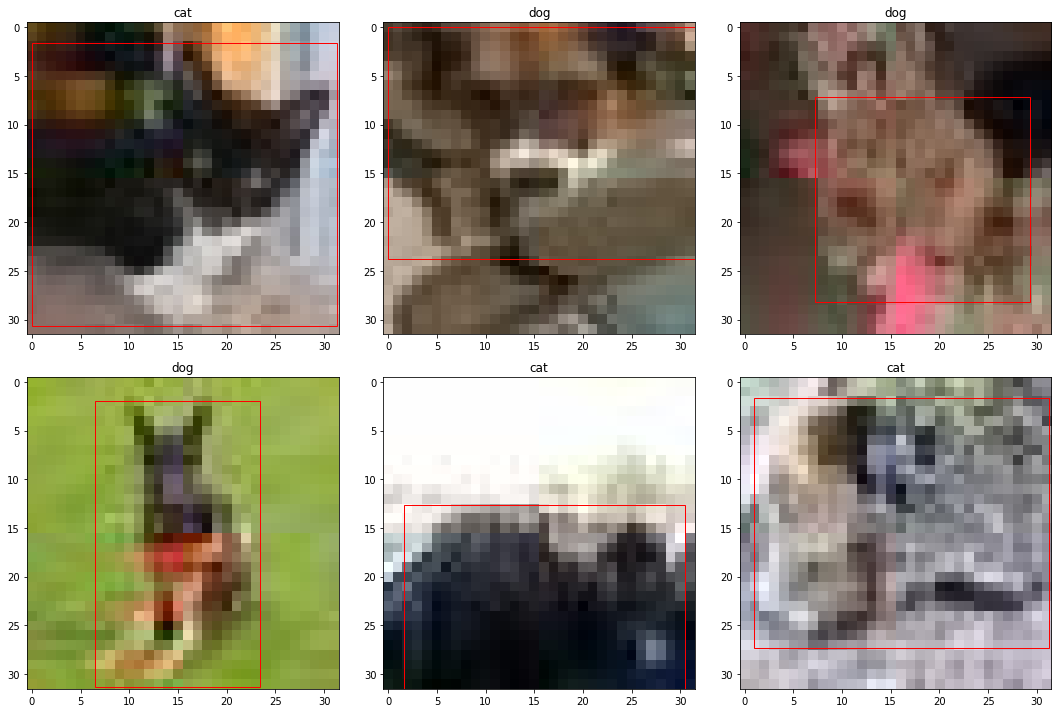

In [37]:
# plot random 6 images
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False,figsize=(15,10))
ax = ax.flatten()

for i,j in enumerate(np.random.choice(df.shape[0], size=6, replace=False)):
    img = mpimg.imread(path+'/resized/'+df.ImageID.values[j]+'.jpg')
    h, w = img.shape[:2]
    coords = df.iloc[j,4:8]
    ax[i].imshow(img)
    ax[i].set_title(df.iloc[j,2])
    ax[i].add_patch(plt.Rectangle((coords[0]*w, coords[2]*h), 
                                  coords[1]*w-coords[0]*w, coords[3]*h-coords[2]*h, 
                                  edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()

In [38]:
# encode labels
df['Label'] = (df.LabelName == 'dog').astype(np.uint8)

#### Comparing Images Before an After Resize

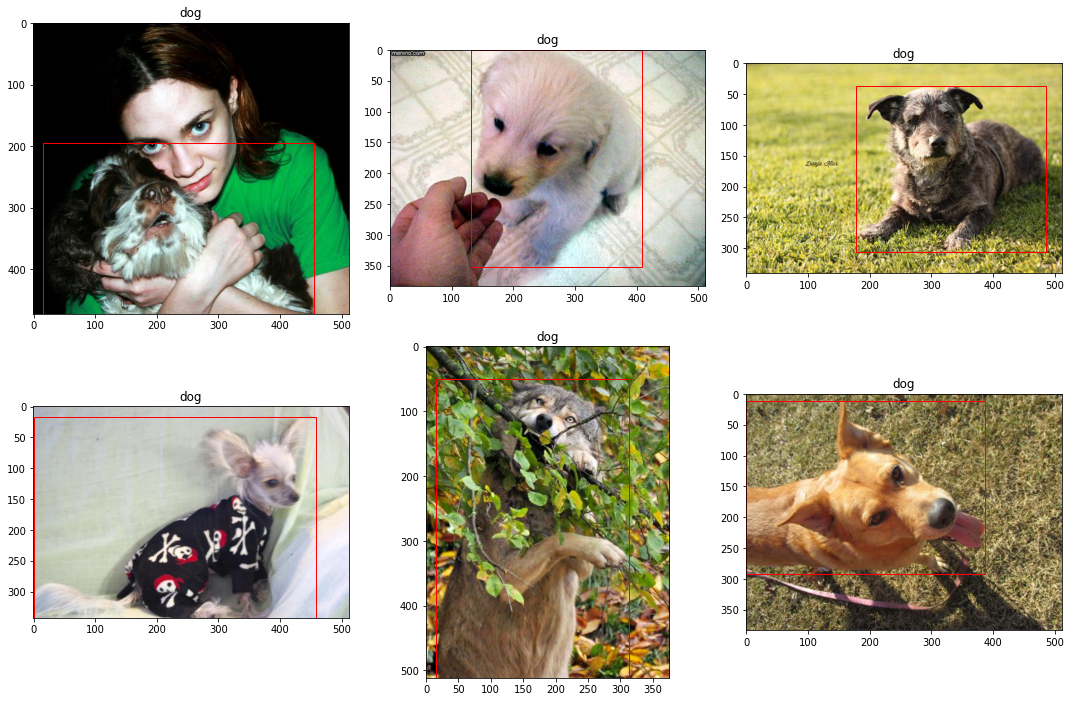

In [39]:
# plot first 6 images
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False,figsize=(15,10))
ax = ax.flatten()

for i,j in enumerate(df.index[5584:5590].to_numpy()):
    img = mpimg.imread(path + df.ImageID.values[j] + '.jpg')
    h, w = img.shape[:2]
    coords = df.iloc[j,4:8]
    ax[i].imshow(img)
    ax[i].set_title(df.LabelName[j])
    ax[i].add_patch(plt.Rectangle((coords[0]*w, coords[2]*h), 
                                  coords[1]*w-coords[0]*w, coords[3]*h-coords[2]*h, 
                                  edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()

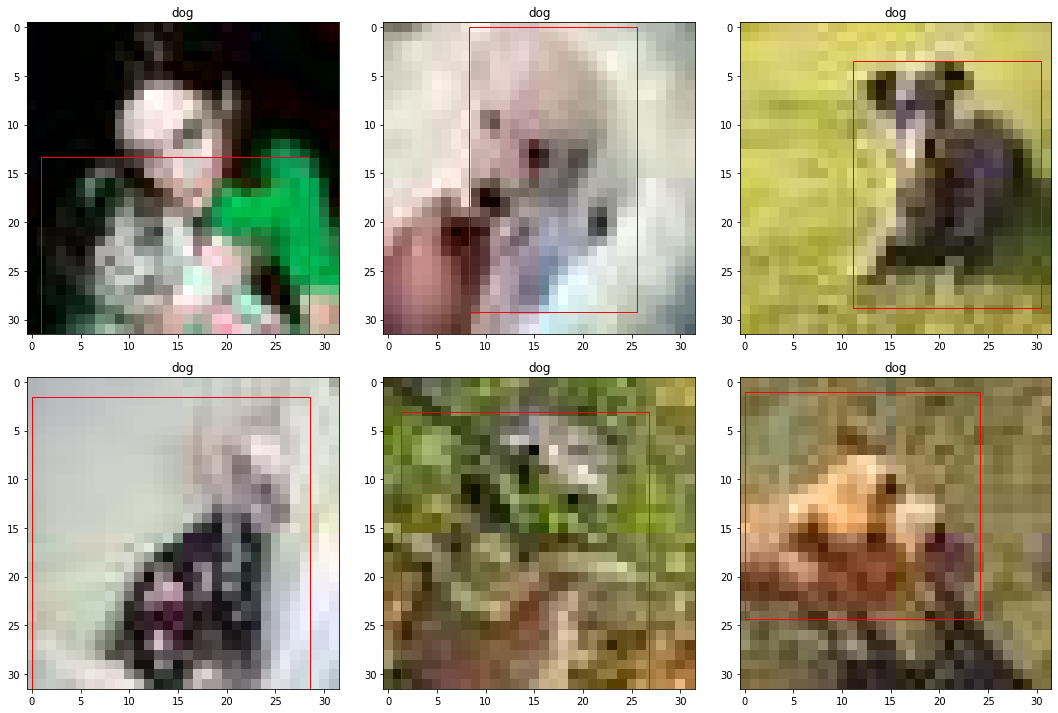

In [40]:
# plot the same 6 images shown above after transforamtion
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False,figsize=(15,10))
ax = ax.flatten()

for i,j in enumerate(df.index[5584:5590].to_numpy()):
    img = mpimg.imread(path+'/resized/'+df.ImageID.values[j]+'.jpg')
    h, w = img.shape[:2]
    coords = df.iloc[j,4:8]
    ax[i].imshow(img)
    ax[i].set_title(df.iloc[j,2])
    ax[i].add_patch(plt.Rectangle((coords[0]*w, coords[2]*h), 
                                  coords[1]*w-coords[0]*w, coords[3]*h-coords[2]*h, 
                                  edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()

## Checkpoint and Save data

In [41]:
mkdir -p data

In [42]:
np.save('data/img.npy', img_arr.astype(np.uint8))
np.save('data/y_label.npy', df.Label.values)
np.save('data/y_bbox.npy', df[['XMin', 'YMin', 'XMax', 'YMax']].values.astype(np.float32))

# Baseline in SKLearn

## Load data

In [43]:
X = np.load('data/img.npy', allow_pickle=True)
y_label = np.load('data/y_label.npy', allow_pickle=True)
y_bbox = np.load('data/y_bbox.npy', allow_pickle=True)

In [44]:
df.columns

Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside', 'XClick1X', 'XClick2X', 'XClick3X', 'XClick4X', 'XClick1Y',
       'XClick2Y', 'XClick3Y', 'XClick4Y', 'ImageArray', 'Label'],
      dtype='object')

In [45]:
idx_to_label = {1:'dog', 0:'cat'} # encoder

Double check that it loaded correctly

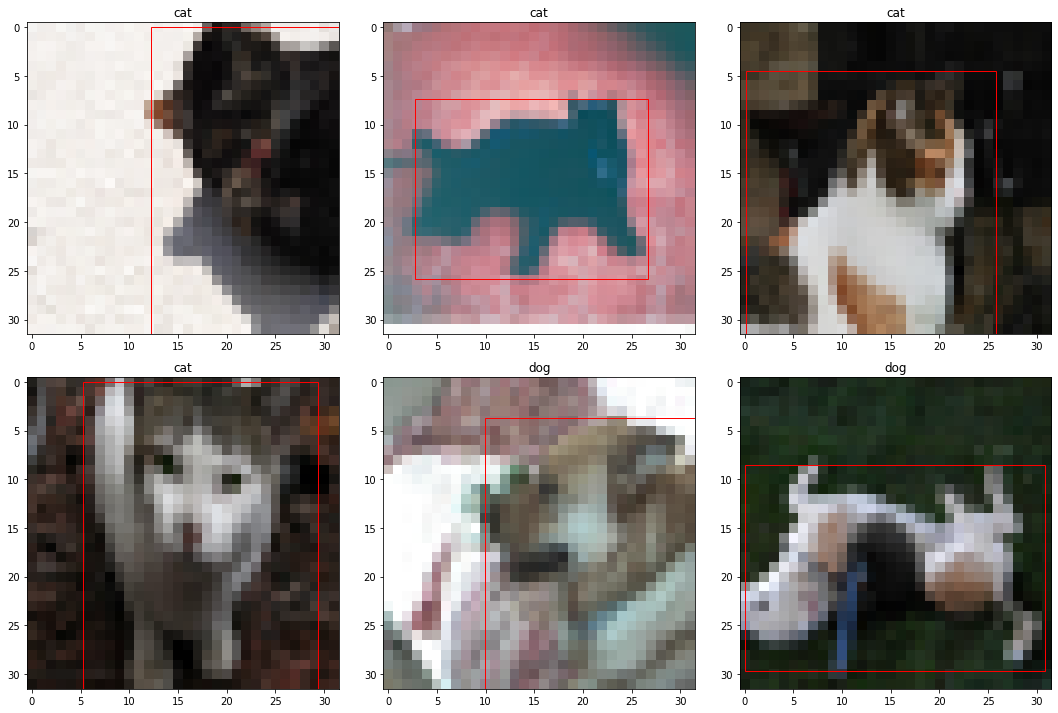

In [46]:
# plot random 6 images
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False,figsize=(15,10))
ax = ax.flatten()

for i,j in enumerate(np.random.choice(X.shape[0], size=6, replace=False)):
    coords = y_bbox[j] * 32
    ax[i].imshow(X[j].reshape(32,32,3))
    ax[i].set_title(idx_to_label[y_label[j]])
    ax[i].add_patch(plt.Rectangle((coords[0], coords[1]), 
                                  coords[2]-coords[0], coords[3]-coords[1], 
                                  edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()

# Classification

### Split data

Create training and testing sets

In [ ]:
X_train, X_test, y_train, y_test_label = train_test_split(X, y_label, test_size=0.01, random_state=27)

### Train

I'm choosing `SGDClassifier` because the data is large and I want to be able to perform stochastic gradient descent and also its ability to early stop. With this many parameters, a model can easily overfit so it's important to try and find the point of where it begins to overfit and stop for optimal results.

In [ ]:
%%time
model = SGDClassifier(loss='log', n_jobs=-1, random_state=27, learning_rate='adaptive', eta0=1e-10, 
                      early_stopping=True, validation_fraction=0.1, n_iter_no_change=3)
# 0.2 validation TODO
model.fit(X_train, y_train)

CPU times: user 1.06 s, sys: 511 ms, total: 1.57 s
Wall time: 1.15 s


In [ ]:
model.n_iter_

4

Did it stop too early? Let's retrain with a few more iterations to see. Note that `SGDClassifier` has a parameter called `validation_fraction` which splits a validation set from the training data to determine when it stops.

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=27)

In [ ]:
model2 = SGDClassifier(loss='log', n_jobs=-1, random_state=27, learning_rate='adaptive', eta0=1e-10)

epochs = 30

train_acc = np.zeros(epochs)
valid_acc = np.zeros(epochs)
for i in tqdm(range(epochs)):
    model2.partial_fit(X_train, y_train, np.unique(y_train))
    
    #log
    train_acc[i] += np.round(accuracy_score(y_train, model2.predict(X_train)),3)
    valid_acc[i] += np.round(accuracy_score(y_valid, model2.predict(X_valid)),3)

  0%|          | 0/30 [00:00<?, ?it/s]

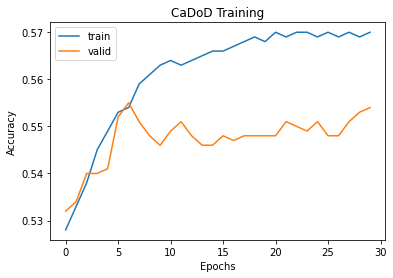

In [ ]:
plt.plot(train_acc, label='train')
plt.plot(valid_acc, label='valid')
plt.title('CaDoD Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
del model2

### Evaluation

In [ ]:
expLog = pd.DataFrame(columns=["exp_name", 
                               "Train Acc", 
                               "Valid Acc",
                               "Test  Acc",
                               "Train MSE", 
                               "Valid MSE",
                               "Test  MSE",
                              ])

In [ ]:
exp_name = f"Baseline: Linear Model"
expLog.loc[0,:4] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test_label, model.predict(X_test))],3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  """


In [ ]:
expLog

exp_name Train Acc Valid Acc  ... Train MSE Valid MSE Test  MSE
0  Baseline: Linear Model     0.565     0.557  ...       NaN       NaN       NaN

[1 rows x 7 columns]

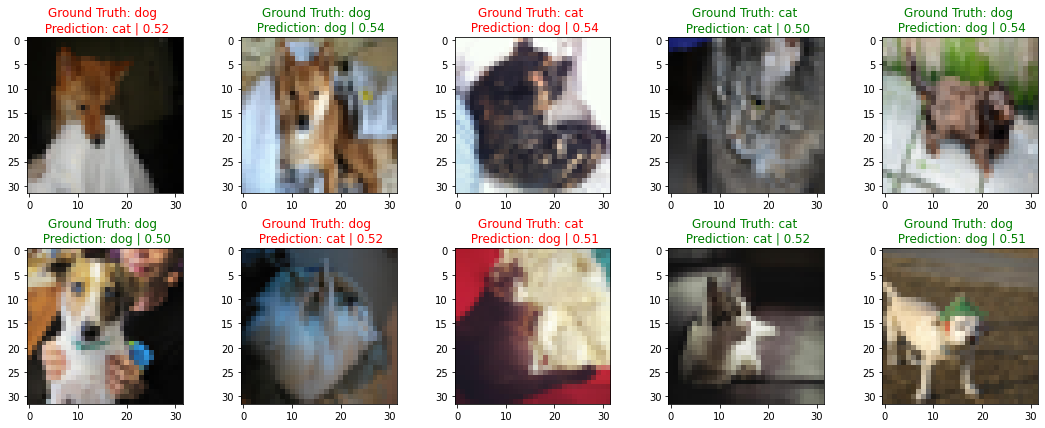

In [ ]:
y_pred_label = model.predict(X_test)
y_pred_label_proba = model.predict_proba(X_test)

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=False, sharey=False,figsize=(15,6))
ax = ax.flatten()

for i in range(10):
    img = X_test[i].reshape(32,32,3)
    ax[i].imshow(img)
    ax[i].set_title("Ground Truth: {0} \n Prediction: {1} | {2:.2f}".format(idx_to_label[y_test_label[i]],
                                                                   idx_to_label[y_pred_label[i]],
                                                                   y_pred_label_proba[i][y_pred_label[i]]),
                   color=("green" if y_pred_label[i]==y_test_label[i] else "red"))

plt.tight_layout()
plt.show()

Import Required Libraries


In [ ]:
# imports
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re
from time import time
from scipy import stats
import json

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
# Imports for metrics
from sklearn.model_selection import cross_val_score, ShuffleSplit
# Imports for stats
from scipy import stats
                       
# Convert a number to a percent.    
def pct(x):
    return round(100*x,1)

# Set up reporting
import pandas as pd
results = pd.DataFrame(columns=["ExpID", "Cross fold train accuracy", "Test Accuracy", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])

# Set up ShuffleSplit for p_value testing
cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=0)

In [ ]:
def ttest(control, treatment):
    #paired t-test; two-tailed p-value      A   ,    B
    (t_score, p_value) = stats.ttest_rel(control, treatment)

    if p_value > 0.05/2:  #Two sided 
        print('There is no significant difference between the two machine learning pipelines (Accept H0)')
    else:
        print('The two machine learning pipelines are different (reject H0) \n(t_score, p_value) = (%.2f, %.5f)'%(t_score, p_value) )
        if t_score > 0.0: #in the case of regression lower RMSE is better; A is lower 
            print('Machine learning pipeline A is better than B')
        else:
            print('Machine learning pipeline B is better than A')
    return p_value

In [ ]:
data = df
y_data = data['Label']
x_data = data.drop(['Label', 'XClick1X', 'XClick2X','XClick3X','XClick4X','XClick1Y', 'XClick2Y','XClick3Y','XClick4Y','Source'], axis = 1)

In [ ]:
corr_matrix = data.corr()
corr_matrix["Label"].sort_values(ascending=False)

Label          1.000000
IsOccluded     0.397112
XClick4X       0.167493
XClick2Y       0.134961
XClick1Y       0.132553
XClick4Y       0.109203
XMin           0.103046
YMin           0.083317
XClick3X       0.077203
XClick1X       0.072189
XClick2X       0.041927
XClick3Y       0.035337
YMax           0.029408
IsTruncated    0.020644
IsDepiction    0.018157
IsGroupOf      0.003171
IsInside      -0.030458
XMax          -0.085277
Confidence          NaN
Name: Label, dtype: float64

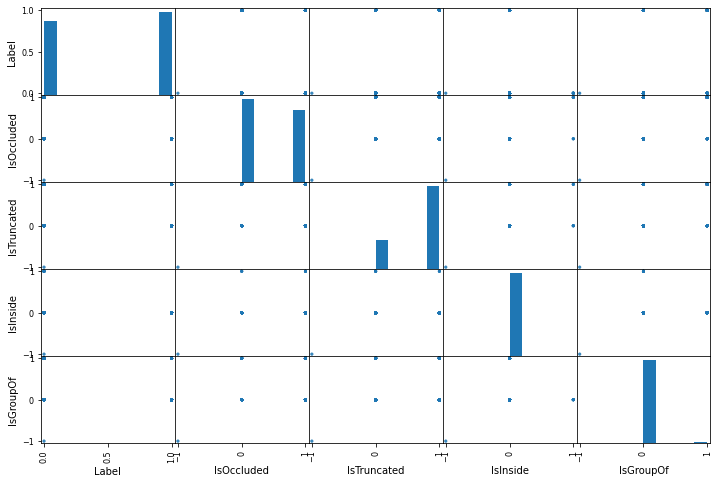

In [ ]:
# Correlation observation

from pandas.plotting import scatter_matrix

# Top four correlated inputs with survived
attributes = ["Label", "IsOccluded", "IsTruncated", "IsInside", "IsGroupOf"]
scatter_matrix(data[attributes], figsize=(12, 8));

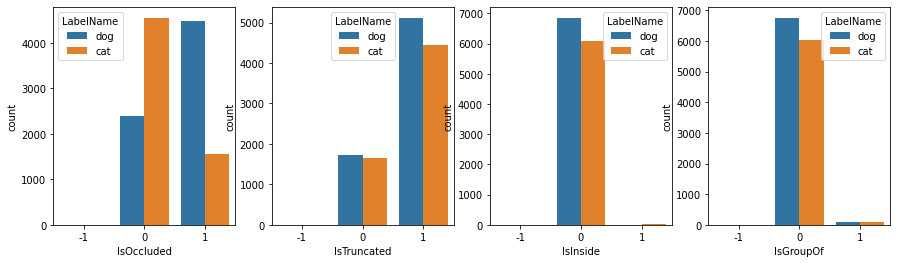

In [ ]:
cat_vars = ['IsOccluded', 'IsTruncated', 'IsInside','IsGroupOf']
plt.figure(figsize=(15,4))
for idx, cat in enumerate(cat_vars):
    plt.subplot(1, 4, idx+1)
    sns.countplot(data[cat], hue=data['LabelName'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=42)

#### Build Processing Pipelines

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion

# Identify the numeric features we wish to consider. 
num_attribs = [
    'IsOccluded', 
    'IsTruncated', 
    'IsInside',
    'IsGroupOf'
]
# Create a pipeline for the numeric features.
# Use DataFrameSelector with the numeric features defined above
# Use StandardScaler() to standardize the data
# Missing values will be imputed using the feature median.
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)),
                         ('imputer', SimpleImputer(strategy="median")),
                         ('standard_scaler', StandardScaler()),])            

# Identify the categorical features we wish to consider.
cat_attribs = [
    "LabelName"
]
# Identiy the range of expected values for the categorical features.
cat_values = [
    ['Dog','Cat'],     # Embarked
]
# Create a pipelne for the categorical features.
# Entries with missing values or values that don't exist in the range
# defined above will be one hot encoded as zeroes.
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),("cat_pipeline", cat_pipeline),]) #TODO <- ColumnTransformer




### Modelling

### Baseline Logistic Regression

In [ ]:
X = np.load('data/img.npy', allow_pickle=True)
y_label = np.load('data/y_label.npy', allow_pickle=True)
y_bbox = np.load('data/y_bbox.npy', allow_pickle=True)

# y is y_label
X_train_class, X_test_class, y_train_label, y_test_label = train_test_split(X, y_label, stratify=y_label, shuffle=True, test_size=0.50, random_state=27)

idx_to_label = {1:'dog', 0:'cat'} # encoder

# scale data 
np.random.seed(42)
X = X.astype(np.float32) / 255.
y_label=y_label.astype(int)

X_train_class, X_test_class, y_train_label, y_test_label = train_test_split(X, y_label, stratify=y_label, shuffle=True, test_size=0.20, random_state=27)

X_train_full = X_train_class
y_train_full = y_train_label
X_test_full = X_test_class
y_test_full = y_test_label

X_train, _, y_train, _ = train_test_split(X_train_class, y_train_label, stratify=y_train_label, train_size=0.1, random_state=42)

X_test, _, y_test, _ = train_test_split(X_test_class, y_test_label, stratify=y_test_label, train_size=0.1, random_state=42)


In [ ]:
# use full pipeline above to build full pipeline with predictor
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("linear", LogisticRegression(random_state=42))
    ])

start = time()
x_train = X_train
y_train = y_train

full_pipeline_with_predictor.fit(x_train, y_train)
np.random.seed(42)

In [ ]:
start = time()

x_train = X_train
y_train = y_train


full_pipeline_with_predictor.fit(x_train, y_train)
np.random.seed(42)

# Set up cross validation scores 
# Use ShuffleSplit() with 30 splits, 30% test_size 
# and a random seed of 0
#==================================================#
#               Your code starts here              #
#==================================================#
cv3Splits = ShuffleSplit(n_splits=3, random_state=0, test_size=0.30, train_size=None)
logit_scores = cross_val_score(full_pipeline_with_predictor, x_train, y_train, cv=cv3Splits)             
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#
logit_score_train = logit_scores.mean()
train_time = np.round(time() - start, 4)

In [ ]:
# Time and score test predictions

x_test = X_test
y_test = y_test

start = time()
logit_score_test  = full_pipeline_with_predictor.score(x_test, y_test)
test_time = np.round(time() - start, 4)

In [ ]:
results.loc[0] = ["Baseline", pct(logit_score_train), np.round(pct(logit_score_test),3), 
                  "---", train_time, test_time, "Untuned LogisticRegression"]
results

ExpID  ...      Experiment description
0  Baseline  ...  Untuned LogisticRegression

[1 rows x 7 columns]

In [ ]:
# A Function to execute the grid search and record the results.
def ConductGridSearch(X_train, y_train, X_test, y_test, i=0, prefix='', n_jobs=-1,verbose=1):
    # Create a list of classifiers for our grid search experiment
    classifiers = [
        ('Logistic Regression', LogisticRegression(random_state=42)),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('Support Vector', SVC(random_state=42)),
        ('Stochastic GD', SGDClassifier(loss='log',
                                        penalty='l2',
                                        early_stopping=True,
                                        max_iter=10000, tol=1e-5,
                                        random_state=42)),
        ('RandomForest', RandomForestClassifier(random_state=42)),
        ('xgb', xgb.XGBRegressor(validation_fraction=0.2,
                         n_iter_no_change=5, tol=0.01,
                         random_state=0, verbose=1))
    ]

    # Arrange grid search parameters for each classifier
    params_grid = {
        'Logistic Regression': {
            'penalty': ('l1', 'l2'),
            'tol': (0.0001, 0.00001, 0.0000001), 
            'C': (10, 1, 0.1, 0.01),
        },
        'K-Nearest Neighbors': {
            'n_neighbors': (3, 5, 7, 8, 11),
            'p': (1,2),
        },
        'Naive Bayes': {},
        'Support Vector' : {
            'kernel': ('rbf', 'poly'),     
            'degree': (1, 2, 3, 4, 5),
            'C': (10, 1, 0.1, 0.01),
        },
        'Stochastic GD': {
            'tol': (0.0001, 0.0000001), 
            'alpha': (0.1, 0.001, 0.0001), 
        },
        'RandomForest':  {
            'max_depth': [9, 15, 22],
            'max_features': [3, 5, 50],
            'min_samples_split': [2, 5, 15],
            'min_samples_leaf': [2, 3, 5],
            'bootstrap': [False],
            'n_estimators':[20, 80, 300]},
        'xgb': {
            'n_estimators':[20,80,300]
        },
 
    }
    
    for (name, classifier) in classifiers:
        i += 1
        # Print classifier and parameters
        print('****** START',prefix, name,'*****')
        parameters = params_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline_with_predictor = Pipeline([
        #("preparation", full_pipeline),
        ("predictor", classifier)
        ])
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        grid_search = GridSearchCV(full_pipeline_with_predictor, params, scoring='accuracy', cv=5, 
                                   n_jobs=n_jobs, verbose=verbose)
        grid_search.fit(X_train, y_train)
                
        # Best estimator score
        best_train = pct(grid_search.best_score_)

        # Best estimator fitting time
        start = time()
        grid_search.best_estimator_.fit(X_train, y_train)
        train_time = round(time() - start, 4)

        # Best estimator prediction time
        start = time()
        best_test_accuracy = pct(grid_search.best_estimator_.score(X_test, y_test))
        test_time = round(time() - start, 4)

        # Generate 30 training accuracy scores with the best estimator and 30-split CV
        # To calculate the best_train_accuracy use the pct() and mean() methods
        #==================================================#
        #               Your code starts here              #
        #==================================================#
        best_train_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=cv3Splits)
        best_train_accuracy = pct(best_train_scores.mean())
        
        #==================================================#
        #               Your code ends here                #
        #               Please don't add code below here   #
        #==================================================#    
       
        # Conduct t-test with baseline logit (control) and best estimator (experiment)
        (t_stat, p_value) = stats.ttest_rel(logit_scores, best_train_scores)
        
        # Collect the best parameters found by the grid search
        print("Best Parameters:")
        best_parameters = grid_search.best_estimator_.get_params()
        param_dump = []
        for param_name in sorted(params.keys()):
            param_dump.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",prefix,name," *****")
        print("")
        
        # Record the results
        results.loc[i] = [prefix+name, best_train_accuracy, best_test_accuracy, round(p_value,5), train_time, test_time, json.dumps(param_dump)]
     

In [ ]:
%%time

import xgboost as xgb

# This might take a while
if __name__ == "__main__":
    
    ConductGridSearch(X_train, y_train, X_test, y_test, 0, "Best Model:",  n_jobs=-1,verbose=1)

****** START Best Model: Logistic Regression *****
Parameters:
	C: (10, 1, 0.1, 0.01)
	penalty: ('l1', 'l2')
	tol: (0.0001, 1e-05, 1e-07)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:
	predictor__C: 0.01
	predictor__penalty: l2
	predictor__tol: 0.0001
****** FINISH Best Model: Logistic Regression  *****

****** START Best Model: K-Nearest Neighbors *****
Parameters:
	n_neighbors: (3, 5, 7, 8, 11)
	p: (1, 2)
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:
	predictor__n_neighbors: 11
	predictor__p: 2
****** FINISH Best Model: K-Nearest Neighbors  *****

****** START Best Model: Naive Bayes *****
Parameters:
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters:
****** FINISH Best Model: Naive Bayes  *****

****** START Best Model: Support Vector *****
Parameters:
	C: (10, 1, 0.1, 0.01)
	degree: (1, 2, 3, 4, 5)
	kernel: ('rbf', 'poly')
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Para

In [ ]:
results

ExpID  ...                             Experiment description
0                        Baseline  ...                         Untuned LogisticRegression
1  Best Model:Logistic Regression  ...  [["predictor__C", 0.01], ["predictor__penalty"...
2  Best Model:K-Nearest Neighbors  ...  [["predictor__n_neighbors", 11], ["predictor__...
3          Best Model:Naive Bayes  ...                                                 []
4       Best Model:Support Vector  ...  [["predictor__C", 1], ["predictor__degree", 1]...
5        Best Model:Stochastic GD  ...  [["predictor__alpha", 0.1], ["predictor__tol",...
6         Best Model:RandomForest  ...  [["predictor__bootstrap", false], ["predictor_...
7                  Best Model:xgb  ...                  [["predictor__n_estimators", 20]]

[8 rows x 7 columns]

# Regression

### Split data

In [47]:
df.columns

Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside', 'XClick1X', 'XClick2X', 'XClick3X', 'XClick4X', 'XClick1Y',
       'XClick2Y', 'XClick3Y', 'XClick4Y', 'ImageArray', 'Label'],
      dtype='object')

In [48]:
Z=df.copy()
Z.drop(columns=['Label','XMin', 'XMax', 'YMin','YMax','ImageID', 'Source', 'LabelName'],inplace=True)

In [49]:
Z.drop(columns=["ImageArray"],inplace=True)

In [50]:
# np.concatenate([df['ImageArray'].iloc[0],np.array([1,2])])

In [51]:
Z.columns

Index(['Confidence', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside', 'XClick1X', 'XClick2X', 'XClick3X', 'XClick4X', 'XClick1Y',
       'XClick2Y', 'XClick3Y', 'XClick4Y'],
      dtype='object')

In [52]:
columns=Z.columns 

final=[]
W=[]
for i in range(0,len(df)):
  arr=[]
  for each in columns:
    arr.append(Z[each].iloc[i])
  # final.append(np.concatenate([df['ImageArray'].iloc[i],np.array(arr)]))
  final.append(df['ImageArray'].iloc[i])

In [53]:
np.array(final).shape

(12966, 3072)

In [54]:
classDf=df.copy()

In [55]:
classDf.drop(columns=['ImageID', 'Source', 'LabelName', 'Confidence', 'ImageArray', 'Label'],inplace=True)

In [56]:
columns=classDf.columns 

classification=[]

for i in range(0,len(df)):
  arr1=[]
  for each in columns:
    arr1.append(classDf[each].iloc[i])
  # classification.append(np.concatenate([df['ImageArray'].iloc[i],np.array(arr1)]))
  classification.append(df['ImageArray'].iloc[i])

In [57]:
np.array(classification).shape

(12966, 3072)

In [58]:
np.array(final).shape

(12966, 3072)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(np.array(final), y_bbox, test_size=0.01, random_state=27)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=27)

### Train

In [ ]:
%%time

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from time import time
# 

basepipeline_LR = Pipeline([
                  ("std_scaler", StandardScaler()),
                  ('LinearRegression', LinearRegression())
                  ])
start = time()
basepipeline_LR.fit(X_train, y_train)
train_time = np.round(time() - start, 4) 

# might take a few minutes to train
#CPU times: user 1h 26min 40s, sys: 5min 53s, total: 1h 32min 34s
#Wall time: 17min 24s

CPU times: user 45.9 s, sys: 1.74 s, total: 47.7 s
Wall time: 25.2 s


#### Mean Absolute Percentage Error Calculation :

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true.ravel() - y_pred.ravel()) / y_true.ravel())) * 100

### Experiment Log for baseline LR:

In [ ]:
expLog_LR = pd.DataFrame(columns=["exp_name",
                               "Train RMSE", 
                               "Valid RMSE",
                               "Test  RMSE",
                               "Train MAE", 
                               "Valid MAE",
                               "Test  MAE",
                               "Train time"
                                ])

In [ ]:
print(mean_squared_error(y_train, basepipeline_LR.predict(X_train)), 
          mean_squared_error(y_valid, basepipeline_LR.predict(X_valid)), 
          mean_squared_error(y_test, basepipeline_LR.predict(X_test)))

exp_name = f"Baseline: Linear Regression Model"
expLog_LR.loc[0,:10] = [f"{exp_name}"]+list(np.round([np.sqrt(mean_squared_error(y_train, basepipeline_LR.predict(X_train))), 
                                                      np.sqrt(mean_squared_error(y_valid, basepipeline_LR.predict(X_valid))), 
                                                      np.sqrt(mean_squared_error(y_test, basepipeline_LR.predict(X_test))),
                                                      mean_absolute_error(y_train, basepipeline_LR.predict(X_train)), 
                                                      mean_absolute_error(y_valid, basepipeline_LR.predict(X_valid)), 
                                                      mean_absolute_error(y_test, basepipeline_LR.predict(X_test)),
                                                      train_time
                                                     ],3))

expLog_LR

0.0071202878133270545 0.01518516265068297 0.014661098016082917


exp_name Train RMSE  ... Test  MAE Train time
0  Baseline: Linear Regression Model      0.084  ...     0.094     25.227

[1 rows x 8 columns]

#### Baseline LR with Lasso and Ridge Regularization

In [ ]:
%%time
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# 
estimators = [('ridge', Ridge()),
              ('lasso', Lasso())]

best_score = []
best_param = []
start = time()
for estimator in estimators:
    params = {estimator[0]+'__alpha':[.05, .1, .5, 1]}
    pipe = Pipeline([('std_scaler', StandardScaler()),
                 (estimator[0], estimator[1])])
    gs = GridSearchCV(pipe,params,scoring='neg_mean_squared_error')
    gs.fit(X_train, y_train)
    best_score.append(gs.best_score_)
    best_param.append(gs.best_params_)
best_idx = np.argmax(best_score)

train_time = np.round(time() - start, 4) 
print('Best model is:', estimators[best_idx][0], 'with parameter', best_param[best_idx])

Best model is: lasso with parameter {'lasso__alpha': 0.05}
CPU times: user 3min 1s, sys: 21.2 s, total: 3min 22s
Wall time: 1min 58s


Best parameter Alpha:

In [ ]:
estimator = [Ridge, Lasso][best_idx]
param = list(gs.best_params_.values())[0]
print (param)
LR_Ridge_Lasso_Pregularized_pipe = Pipeline([
                                     ('std_scalar', StandardScaler()), 
                                     ('estimator', estimator(alpha=param))])
start = time()
LR_Ridge_Lasso_Pregularized_pipe.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

0.05


Experiment Evaluation for Ridge/Lasso:

In [ ]:
exp_name = f"Linear Regression(best regularization and alpha)"
expLog_LR.loc[len(expLog_LR)] = [f"{exp_name}"]+list(np.round([np.sqrt(mean_squared_error(y_train, LR_Ridge_Lasso_Pregularized_pipe.predict(X_train))), 
          np.sqrt(mean_squared_error(y_valid, LR_Ridge_Lasso_Pregularized_pipe.predict(X_valid))), 
          np.sqrt(mean_squared_error(y_test, LR_Ridge_Lasso_Pregularized_pipe.predict(X_test))),
          mean_absolute_error(y_train, LR_Ridge_Lasso_Pregularized_pipe.predict(X_train)), 
          mean_absolute_error(y_valid, LR_Ridge_Lasso_Pregularized_pipe.predict(X_valid)), 
          mean_absolute_error(y_test, LR_Ridge_Lasso_Pregularized_pipe.predict(X_test)),
          train_time
          ],3))
expLog_LR

exp_name  ... Train time
0                 Baseline: Linear Regression Model  ...     25.227
1  Linear Regression(best regularization and alpha)  ...      1.776

[2 rows x 8 columns]

#### Random Forest Regressor with LR

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor

Random_Forest_LR = Pipeline([
                             ('std_scaler', StandardScaler()),
                             ('Random_Forest', MultiOutputRegressor(RandomForestRegressor()))
                             ])

grid_forest_fr = {
    'Random_Forest__estimator__max_depth': [3, 5],
    'Random_Forest__estimator__max_features': [2, 3],
    'Random_Forest__estimator__min_samples_leaf': [3, 4],
    'Random_Forest__estimator__min_samples_split': [2, 5],
    'Random_Forest__estimator__n_estimators': [80, 100]
}

random_forest_LR = (GridSearchCV(estimator=Random_Forest_LR, 
                                 param_grid=grid_forest_fr, 
                                 cv=2,
                                 scoring = 'neg_mean_squared_error',
                                 n_jobs = -1))
random_forest_LR.estimator.get_params().keys()
start = time()
random_forest_LR = random_forest_LR.fit(X_train,y_train)
train_time = np.round(time() - start, 4)
random_forest_LR.best_estimator_ 

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('Random_Forest',
                 MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=5,
                                                                      max_features=3,
                                                                      min_samples_leaf=4,
                                                                      min_samples_split=5)))])

In [ ]:
exp_name = f"Multi output Random forest regressor"
expLog_LR.loc[len(expLog_LR)] = [f"{exp_name}"]+list(np.round([np.sqrt(mean_squared_error(y_train, random_forest_LR.predict(X_train))), 
          np.sqrt(mean_squared_error(y_valid, random_forest_LR.predict(X_valid))), 
          np.sqrt(mean_squared_error(y_test, random_forest_LR.predict(X_test))),
          mean_absolute_error(y_train, random_forest_LR.predict(X_train)), 
          mean_absolute_error(y_valid, random_forest_LR.predict(X_valid)), 
          mean_absolute_error(y_test, random_forest_LR.predict(X_test)),
          train_time
          ],3))
expLog_LR

exp_name  ... Train time
0                 Baseline: Linear Regression Model  ...     25.227
1  Linear Regression(best regularization and alpha)  ...      1.776
2              Multi output Random forest regressor  ...    132.356

[3 rows x 8 columns]

### Evaluation

In [ ]:
expLog.iloc[0,4:] = list(np.round([mean_squared_error(y_train, basepipeline_LR.predict(X_train)), 
          mean_squared_error(y_valid, basepipeline_LR.predict(X_valid)), 
          mean_squared_error(y_test, basepipeline_LR.predict(X_test))],3))

expLog

exp_name Train Acc Valid Acc  ... Train MSE Valid MSE Test  MSE
0  Baseline: Linear Model     0.565     0.557  ...     0.007     0.015     0.015

[1 rows x 7 columns]

# Results / Discussion

Our objective of the classification model is to predict the class that is whether the image contains a cat or a dog.
We have compared across varied different classification models and different parameters which resulted in a maximum accuracy of 57 % for Stochastic gradient descent and the next best came up for random forest.We could observe that the majority of models have the test accuracy in the range of 52-57%. We will try to get better results by simplifying the images and by applying dimension and feature reduction along wth deep learning algorithms to improve speed and accuracy.

With regression models we have predicted the bounding box coordinates along with regression metrics for three different regressors. We tried to implement Baseline Linear regrssor, LR with Lasso and Rigde Regularization and Random forest regressor. We could see that LR with Lasso and Rigde Regularization has provided better metrics.

# Challenges :

The main challenges was to work with a huge dataset and when shifted to colab we were running out of RAM.

To overcome this issue we had to decrease the standardized image size from 128x128 to 32x32.

However this transformation lead to loss of information and predicted distorted images which caused poor prediction of images


# Conclusion

In phase 1, we have focused on the SKLearn Baseline models for Logistic Regression, SGDClassifier to classify the images into cats and dogs and Linear Regression for marking the bounding boxes around the cats and dogs inside the image. 

We have also implemented the Homegrown Logistic Regression and obtained accuracy about 52.6% and also calculated CXE+MSE loss functions.

Plan to implement multi task neural networks for our next phase and try to improve the models accuracy using pytorch, CNN and efficientdet detector.


# PHASE 2  
#### Homegrown cat/dog detector pipeline in Python and Numpy  
* Implement a Homegrown Linear Regression model that has four target values.Extend the  MSE loss function from one target to four targets (x, y, w, h).

* Implement a Homegrown Logistic Regression model. Extend the loss function from CXE to CXE + MSE, i.e., make it a complex multitask loss function where the resulting model predicts the class and bounding box coordinates at the same time

#### PyTorch object detector pipeline 
* Build a PyTorch model for image classification (using a multilayer perceptron (MLP))
* Build another PyTorch model for regression  (using a multilayer perceptron (MLP)) with 4 target values [y_1, y_2, y_3, y_4] corresponding to [x, y, w, h] of the bounding box containing the object of interest).
* Build a multi-headed cat-dog detector using the OOP API in PyTorch with a combined loss function: CXE + MSE.
* Build a convolutional neural network with multi-heads to do cat-dog detection [Stretch goal]

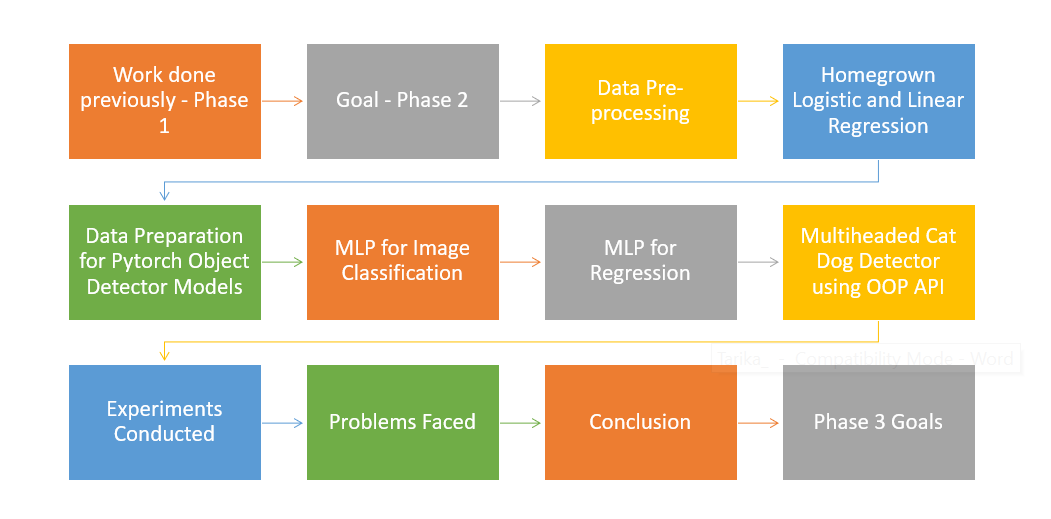


# Homegrown Linear Regression :

Implement a Homegrown Linear Regression model that has four target values.Extend the MSE loss function from one target to four targets (x, y, w, h).

In [61]:
   def normalize(X):
    
      # X --> Input.
      
      # m-> number of training examples
      # n-> number of features 
      m, n = X.shape
      
      # Normalizing all the n features of X.
      for i in range(n):
          X = (X - X.mean(axis=0))/X.std(axis=0)
      
      # scale data 
      np.random.seed(42)
      if np.max(X) > 4.:
          X = X.astype(np.float32) / 255.
          
      return X

In [62]:
final = normalize(np.array(final))
# classification = normalize(np.array(classification))

In [63]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(np.array(final), y_bbox, test_size=0.01, random_state=27)
X_train_r, X_valid_r, y_train_r, y_valid_r = train_test_split(X_train_r, y_train_r, test_size=0.1, random_state=27)

In [64]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(np.array(final), y_label, test_size=0.01, random_state=27)
X_train_c, X_valid_c, y_train_c, y_valid_c = train_test_split(X_train_c, y_train_c, test_size=0.1, random_state=27)

In [68]:
# scale data for reg
np.random.seed(42)
if np.max(X_train_r) > 4.:
    X_train_r = X_train_r.astype(np.float32) / 255.
if np.max(X_valid_r) > 4.:
    X_valid_r = X_valid_r.astype(np.float32) / 255.
y_train_r=y_train_r.astype(int)
y_valid_r=y_valid_r.astype(int)

In [69]:
# scale data for classification
np.random.seed(42)
if np.max(X_train_c) > 4.:
    X_train_c = X_train_c.astype(np.float32) / 255.
if np.max(X_valid_c) > 4.:
    X_valid_c = X_valid_c.astype(np.float32) / 255.
y_train_c=y_train_c.astype(int)
y_valid_c=y_valid_c.astype(int)

In [70]:
import warnings
warnings.filterwarnings('ignore')

class LinearRegressionHomegrown(object):
    
    def __init__(self):
        """
        Constructor for the homgrown Linear Regression
        
        Args:
            None
        
        Return:
            None
        """
        self.coef_r = None       # weight vector
        self.intercept_r = None  # bias term
        self._thetaReg = None      # augmented weight vector, i.e., bias + weights
                                # this allows to treat all decision variables homogeneously
        self.history = {"MSE_train": [], 
                        "Reg_train_MSE":[],
                        "val_MSE":[], 
                        "Reg_val_MSE":[]}
            
    def _gradReg(self, X, y):
      
        # number of training examples
        n = X.shape[0]
        
        # get scores for each class and example
        # 2D matrix
        scores = self._predict_raw(X)
        gradient = np.dot(X.T, scores) / n
        
        return gradient
    
    def _gd(self, X_r, y_r, max_iter, alpha, X_val_r, y_val_r):
        """
        Runs Full GD and logs error, weigths, gradient at every step

        Args:
            X(ndarray):      train objects
            y(ndarray):      answers for train objects
            max_iter(int):   number of weight updates
            alpha(floar):    step size in direction of gradient
            
        Return:
            None
        """
        for i in range(max_iter):
            
            metrics = self.score(X_r, y_r)
            print("Epoch: ",i+1,"- ", metrics)
            self.history["Reg_train_MSE"].append(metrics["Reg_MSE"])
            
            if X_val_r is not None:
                metrics_val = self.score(X_val_r, y_val_r)
                self.history["Reg_val_MSE"].append(metrics_val["Reg_MSE"])

            # calculate gradient for regressor
            grad_reg = self._gradReg(X_r, y_r)

            # do gradient step
            self._thetaReg -= alpha * grad_reg

    
    def fit(self, X_r,y_r, max_iter=1000, alpha=0.05, val_data_r=None):
        """
        Public API to fit Logistic regression model
        Args:
            X(ndarray):      train objects
            y(ndarray):      answers for train objects
            max_iter(int):   number of weight updates
            alpha(floar):    step size in direction of gradient
        Return:
            None
        """
        # Augment the data with the bias term.
        # So we can treat the the input variables and the bias term homogeneously 
        # from a vectorization perspective
        X_r = np.c_[np.ones(X_r.shape[0]), X_r]
        if val_data_r is not None:
            X_val_r, y_val_r = val_data_r
            X_val_r = np.c_[np.ones(X_val_r.shape[0]), X_val_r]
        else:
            X_val_r = None
            y_val_r = None
        # initialize if the first step
        if self._thetaReg is None:
            self._thetaReg = np.random.rand(X_r.shape[1], 4)
    
        # do full gradient descent
        self._gd(X_r, y_r, max_iter, alpha, X_val_r, y_val_r)
        
        # get final weigths and bias
        self.intercept_r = self._thetaReg[0]
        self.coef_r = self._thetaReg[1:]
        
    def score(self, X_r, y_r):
        # number of training samples
        n1 = X_r.shape[0]
        # get scores
        scores_r = self._predict_raw(X_r)
        pred_r=scores_r
        
        # exp=2.73
        # probs = 1.0/(1 + exp**(-scores_c))
        # # print("--------probs-------",probs)
        # # ind=np.argmax(scores_c,axis=1)
        # pred_c=[]
        # for i,ind in enumerate(np.argmax(scores_c,axis=1)):
        #   pred_c.append(int(probs[i][ind]))
        
        # acc = accuracy_score(y_c, np.array(pred_c))
        # pred_c=np.array(pred_c)

        # # trasnform scores to probabilities
        # exp_scores = np.exp(-scores_c)

        # probs1 = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # # print('probs1',probs1,"\nexp_scores",exp_scores)
        # # logloss per each example
        # corect_logprobs = (probs[range(n2),y_c])   
        # # print("\ncorrect log prob",corect_logprobs)
        # # print(corect_logprobs)  
        # # total mean logloss
        # data_loss = np.sum(corect_logprobs) / n2 
        # loss=0
        # for each in corect_logprobs:
        #   if (each!=1 and each!=0):
        #     loss +=y_c * (-np.log (each))  + (1-y_c) * (-np.log (1-each))
          
        metrics = {"Reg_MSE": np.round(mean_squared_error(y_r, pred_r),decimals=10)}
        # print(metrics)
        return metrics
        
    def _predict_raw(self, X):
        """
        Computes scores for each class and each object in X
        Args:
            X(ndarray):      objects
        
        Return:
            scores(ndarray): scores for each class and object
        """

        # check whether X has appended bias feature or not 
        if X.shape[1] == len(self._thetaReg):
            scores = np.dot(X, self._thetaReg)
        else:
            scores = np.dot(X, self.coef_r) + self.intercept_r
        
        return scores
    
    def predict(self, X):
        """
        Predicts class for each object in X
        Args:
            X(ndarray):      objects
        Return:
            pred(ndarray):   class for each object
        """
        # get scores for each class
        scores = self._predict_raw(X)
        # choose class with maximum score
        pred = np.argmax(scores, axis=1)
        return pred

In [ ]:
model_linear_homegrown = LinearRegressionHomegrown()
#model_lr_homegrown.fit(X_train_r, y_train_r, max_iter=100, alpha=0.1,val_data=[X_valid_r,y_valid_r])

model_linear_homegrown.fit(X_train_r, y_train_r, max_iter=1000, alpha=0.00005,val_data_r=[X_valid_r,y_valid_r])

Epoch:  1 -  {'Reg_MSE': 497311.1850962523}
Epoch:  2 -  {'Reg_MSE': 464285.7627598468}
Epoch:  3 -  {'Reg_MSE': 433482.930881073}
Epoch:  4 -  {'Reg_MSE': 404752.3695283258}
Epoch:  5 -  {'Reg_MSE': 377953.9445772342}
Epoch:  6 -  {'Reg_MSE': 352957.0170035906}
Epoch:  7 -  {'Reg_MSE': 329639.799027212}
Epoch:  8 -  {'Reg_MSE': 307888.7539284734}
Epoch:  9 -  {'Reg_MSE': 287598.0365748122}
Epoch:  10 -  {'Reg_MSE': 268668.9718955551}
Epoch:  11 -  {'Reg_MSE': 251009.5687307376}
Epoch:  12 -  {'Reg_MSE': 234534.0666542402}
Epoch:  13 -  {'Reg_MSE': 219162.5135343635}
Epoch:  14 -  {'Reg_MSE': 204820.3717467155}
Epoch:  15 -  {'Reg_MSE': 191438.1510957394}
Epoch:  16 -  {'Reg_MSE': 178951.0666330772}
Epoch:  17 -  {'Reg_MSE': 167298.719683862}
Epoch:  18 -  {'Reg_MSE': 156424.8005066305}
Epoch:  19 -  {'Reg_MSE': 146276.811119326}
Epoch:  20 -  {'Reg_MSE': 136805.806923441}
Epoch:  21 -  {'Reg_MSE': 127966.155851132}
Epoch:  22 -  {'Reg_MSE': 119715.3138466571}
Epoch:  23 -  {'Reg_MSE':

#### Home grown Linear Regression Model :
Mean Square Error = 48.5587

# Homegrown Logistic Regression implementation

Implement a Homegrown Logistic Regression model. Extend the loss function from CXE to CXE + MSE, i.e., make it a complex multitask loss function where the resulting model predicts the class and bounding box coordinates at the same time

In [ ]:
import warnings
warnings.filterwarnings('ignore')

class LogisticRegressionHomegrown(object):
    
    def __init__(self):
        """
        Constructor for the homgrown Logistic Regression
        
        Args:
            None
        
        Return:
            None
        """
        self.coef_r = None       # weight vector
        self.intercept_r = None  # bias term
        self.coef_c = None       # weight vector
        self.intercept_c = None  # bias term
        self._thetaReg = None      # augmented weight vector, i.e., bias + weights
                                # this allows to treat all decision variables homogeneously
        self._thetaClass = None
        self.history = {"CXE+MSE_train": [], 
                        "Class_train_acc": [], 
                        "Class_train_CXE":[],
                        "Reg_train_MSE":[],
                        "val_CXE+MSE":[], 
                        "Class_val_CXE":[],
                        "Class_val_acc": [],
                        "Reg_val_MSE":[]}
        
    # def normalize(X):
    
    #   # X --> Input.
      
    #   # m-> number of training examples
    #   # n-> number of features 
    #   m, n = X.shape
      
    #   # Normalizing all the n features of X.
    #   for i in range(n):
    #       X = (X - X.mean(axis=0))/X.std(axis=0)
      
    #   # scale data 
    #   np.random.seed(42)
    #   if np.max(X) > 4.:
    #       X = X.astype(np.float32) / 255.
          
    #   return X
    
    # gradient for regressor       
    def _gradReg(self, X, y):
      
        # number of training examples
        n = X.shape[0]
        
        # get scores for each class and example
        # 2D matrix
        scores = self._predict_raw(X,val=1)
        gradient = np.dot(X.T, scores) / n
        
        return gradient
    
    # gradient for classifier
    def _gradClass(self, X, y):
        """
        Calculates the gradient of the Logistic Regression 
        objective function
        Args:
            X(ndarray):    train objects
            y(ndarray):    answers for train objects
        Return:
            grad(ndarray): gradient
        """
        # number of training examples
        n = X.shape[0]
        # get scores for each class and example
        # 2D matrix
        scores = self._predict_raw(X,val=2)
        # transform scores to probabilities
        # softmax
        
        probs = 1.0/(1 + np.exp(-scores))
        #probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # error
        probs[range(n),y] -= 1
        # (1/m)*np.dot(X.T, (scores - y))
        # gradient
        gradient = np.dot(X.T, probs) / n
        return gradient
    
    def _gd(self, X_r, y_r,X_c,y_c, max_iter, alpha, X_val_r, y_val_r, X_val_c, y_val_c):
        """
        Runs Full GD and logs error, weigths, gradient at every step

        Args:
            X(ndarray):      train objects
            y(ndarray):      answers for train objects
            max_iter(int):   number of weight updates
            alpha(floar):    step size in direction of gradient
            
        Return:
            None
        """
        for i in range(max_iter):
            
            metrics = self.score(X_r, y_r, X_c, y_c)
            print("Epoch: ",i+1,"- ", metrics)
            self.history["CXE+MSE_train"].append(metrics["CXE+MSE"])
            self.history["Class_train_acc"].append(metrics["Class_acc"])
            self.history["Class_train_CXE"].append(metrics["Class_CXE"])
            self.history["Reg_train_MSE"].append(metrics["Reg_MSE"])
            
            if X_val_r is not None and X_val_c is not None:
                metrics_val = self.score(X_val_r, y_val_r,X_val_c, y_val_c)
                self.history["val_CXE+MSE"].append(metrics_val["CXE+MSE"])
                self.history["Class_val_CXE"].append(metrics_val["Class_CXE"])
                self.history["Class_val_acc"].append(metrics_val["Class_acc"])
                self.history["Reg_val_MSE"].append(metrics_val["Reg_MSE"])

            # calculate gradient for regressor
            grad_reg = self._gradReg(X_r, y_r)

            # calculate gradient for classifier
            grad_class = self._gradClass(X_c, y_c)
            
            # do gradient step
            self._thetaReg -= alpha * grad_reg

            # do gradient step
            self._thetaClass -= alpha * grad_class
    
    def fit(self, X_r,y_r,X_c,y_c, max_iter=1000, alpha=0.05, val_data_r=None, val_data_c=None):
        """
        Public API to fit Logistic regression model
        Args:
            X(ndarray):      train objects
            y(ndarray):      answers for train objects
            max_iter(int):   number of weight updates
            alpha(floar):    step size in direction of gradient
        Return:
            None
        """
        # X_r = normalize(X_r) 
        # X_c = normalize(X_c)
        # Augment the data with the bias term.
        # So we can treat the the input variables and the bias term homogeneously 
        # from a vectorization perspective
        X_r = np.c_[np.ones(X_r.shape[0]), X_r]
        if val_data_r is not None:
            X_val_r, y_val_r = val_data_r
            X_val_r = np.c_[np.ones(X_val_r.shape[0]), X_val_r]
        else:
            X_val_r = None
            y_val_r = None
        # initialize if the first step
        if self._thetaReg is None:
            self._thetaReg = np.random.rand(X_r.shape[1], 4)
    

        #classification
        X_c = np.c_[np.ones(X_c.shape[0]), X_c]
        if val_data_c is not None:
            X_val_c, y_val_c = val_data_c
            X_val_c = np.c_[np.ones(X_val_c.shape[0]), X_val_c]
        else:
            X_val_c = None
            y_val_c = None
        # initialize if the first step
        if self._thetaClass is None:
            self._thetaClass = np.random.rand(X_c.shape[1], len(np.unique(y_c)))
        
        # do full gradient descent
        self._gd(X_r, y_r,X_c,y_c, max_iter, alpha, X_val_r, y_val_r, X_val_c, y_val_c)
        
        # get final weigths and bias
        self.intercept_r = self._thetaReg[0]
        self.coef_r = self._thetaReg[1:]
        
        # get final weigths and bias
        self.intercept_c = self._thetaClass[0]
        self.coef_c = self._thetaClass[1:]
        
    def score(self, X_r, y_r, X_c, y_c):
        # number of training samples
        n1 = X_r.shape[0]
        n2 = X_c.shape[0]
        # get scores
        scores_r = self._predict_raw(X_r,val=1)
        scores_c = self._predict_raw(X_c,val=2)
        pred_r=scores_r
        
        # for i in range(0,len(scores_c)):
        #   pred_c[i]=scores_c[np.argmax(scores_c[i])]
        # print("scores_c",scores_c)
        exp=2.73
        probs = 1.0/(1 + exp**(-scores_c))
        # print("--------probs-------",probs)
        # ind=np.argmax(scores_c,axis=1)
        pred_c=[]
        for i,ind in enumerate(np.argmax(scores_c,axis=1)):
          pred_c.append(int(probs[i][ind]))
        # probs[range(n2),ind] -= 1
        # print("pred_r",pred_r,"\npred_c",pred_c,"\ny_c",y_c)
        #pred_c =  [1 if i > 0.5 else 0 for i in probs.all()]
        # accuracy
        acc = accuracy_score(y_c, np.array(pred_c))
        pred_c=np.array(pred_c)

        # trasnform scores to probabilities
        exp_scores = np.exp(-scores_c)

        probs1 = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # print('probs1',probs1,"\nexp_scores",exp_scores)
        # logloss per each example
        corect_logprobs = (probs[range(n2),y_c])   
        # print("\ncorrect log prob",corect_logprobs)
        # print(corect_logprobs)  
        # total mean logloss
        data_loss = np.sum(corect_logprobs) / n2 
        loss=0
        for each in corect_logprobs:
          if (each!=1 and each!=0):
            loss +=y_c * (-np.log (each))  + (1-y_c) * (-np.log (1-each))
          
    
        # loss = y_c * np.log (corect_logprobs)  + (1-y_c) * np.log (1-corect_logprobs) if ( corect_logprobs != 1 and corect_logprobs != 0 ) else 0

        #loss = -np.mean(y_c*(np.log(corect_logprobs)) - (1-y_c)*np.log(1-corect_logprobs))
        # final metrics
        metrics = {"Class_acc": acc, 
                   "CXE+MSE": np.round(np.mean(loss),decimals=10)+np.round(mean_squared_error(y_r, pred_r),decimals=10), 
                   "Reg_MSE": np.round(mean_squared_error(y_r, pred_r),decimals=10),
                   "Class_CXE":np.round(np.mean(loss),decimals=10)}
        # print(metrics)
        return metrics
        
    def _predict_raw(self, X, val):
        """
        Computes scores for each class and each object in X
        Args:
            X(ndarray):      objects
        
        Return:
            scores(ndarray): scores for each class and object
        """

        if val == 1:
          # check whether X has appended bias feature or not 
          if X.shape[1] == len(self._thetaReg):
              scores = np.dot(X, self._thetaReg)
          else:
              scores = np.dot(X, self.coef_r) + self.intercept_r

        else:
          # check whether X has appended bias feature or not 
          if X.shape[1] == len(self._thetaClass):
              scores = np.dot(X, self._thetaClass)
          else:
              scores = np.dot(X, self.coef_c) + self.intercept_c
        
        return scores
    
    def predict(self, X):
        """
        Predicts class for each object in X
        Args:
            X(ndarray):      objects
        Return:
            pred(ndarray):   class for each object
        """
        # get scores for each class
        scores = self._predict_raw(X,val=2)
        # choose class with maximum score
        pred = np.argmax(scores, axis=1)
        return pred

In [ ]:
model_lr_homegrown = LogisticRegressionHomegrown()
#model_lr_homegrown.fit(X_train_r, y_train_r, max_iter=100, alpha=0.1,val_data=[X_valid_r,y_valid_r])

model_lr_homegrown.fit(X_train_r, y_train_r,X_train_c, y_train_c, max_iter=1000, alpha=0.00005,val_data_r=[X_valid_r,y_valid_r],val_data_c=[X_valid_c,y_valid_c])

Epoch:  1 -  {'Class_acc': 0.5258829639889196, 'CXE+MSE': 1180968.4623501315, 'Reg_MSE': 493148.9830658014, 'Class_CXE': 687819.47928433}
Epoch:  2 -  {'Class_acc': 0.5258829639889196, 'CXE+MSE': 1148203.6913394053, 'Reg_MSE': 460397.2814392102, 'Class_CXE': 687806.4099001951}
Epoch:  3 -  {'Class_acc': 0.5258829639889196, 'CXE+MSE': 1117643.092888654, 'Reg_MSE': 429849.7349677899, 'Class_CXE': 687793.3579208641}
Epoch:  4 -  {'Class_acc': 0.5258829639889196, 'CXE+MSE': 1089137.5610523035, 'Reg_MSE': 401357.2733482536, 'Class_CXE': 687780.2877040498}
Epoch:  5 -  {'Class_acc': 0.5258829639889196, 'CXE+MSE': 1062548.1602737224, 'Reg_MSE': 374780.9272708056, 'Class_CXE': 687767.2330029169}
Epoch:  6 -  {'Class_acc': 0.5258829639889196, 'CXE+MSE': 1038119.6905391545, 'Reg_MSE': 349991.1434686164, 'Class_CXE': 688128.547070538}
Epoch:  7 -  {'Class_acc': 0.5258829639889196, 'CXE+MSE': 1014982.5956713611, 'Reg_MSE': 326867.1462275835, 'Class_CXE': 688115.4494437776}
Epoch:  8 -  {'Class_acc

In [ ]:
np.random.seed(42)
from sklearn.linear_model import LogisticRegression
model_lr_sklearn = LogisticRegression( C=1e6, solver="sag", max_iter=15)
model_lr_sklearn.fit(X_train_c,y_train_c)

LogisticRegression(C=1000000.0, max_iter=15, solver='sag')

In [ ]:
predicted_c=model_lr_sklearn.predict(X_test_c)

In [ ]:
acc = accuracy_score(y_test_c, predicted_c)

In [ ]:
acc

0.49230769230769234

#### Homegrown Logistic Regression Model : 
###### Accuracy : ~ 52.7 %

In order to implement the homegrown version of logistic regression to classify and regress at the same time, we created a class called HomeGrownLogisticRegression that consists of important methods instrumental in training a model. 

The input into the model was a 32x32x3 flattened numpy array of all the images. 

Using gradient updating of weights, we maintained a theta matrix that learnt the weights on how to classify an image as cat or dog and at the same time we maintained another theta matrix that learns the weights to predict the Xmin, Xmax, Ymin and Ymax values using unnormalized distances in logistic regression, aka linear regression. 

We observed that without a learning rate scheduler, we had to use a very small lr value to observe the CXE+MSE values reducing. 

We obtained a classification  accuracy of 52.7% on the validation data and a MSE on its way to convergence at the end of 1000 epochs.

# PyTorch Object Detector Pipeline

# Multilayer Perceptron

In this series we'll be building machine learning models (specifically, neural networks) to perform image classification using PyTorch and Torchvision. 

In this first notebook, we'll start with one of the most basic neural network architectures, a multilayer perceptron (MLP), also known as a feedforward network. The dataset we'll be using is the famous MNIST dataset, a dataset of 28x28 black and white images consisting of handwritten digits, 0 to 9.

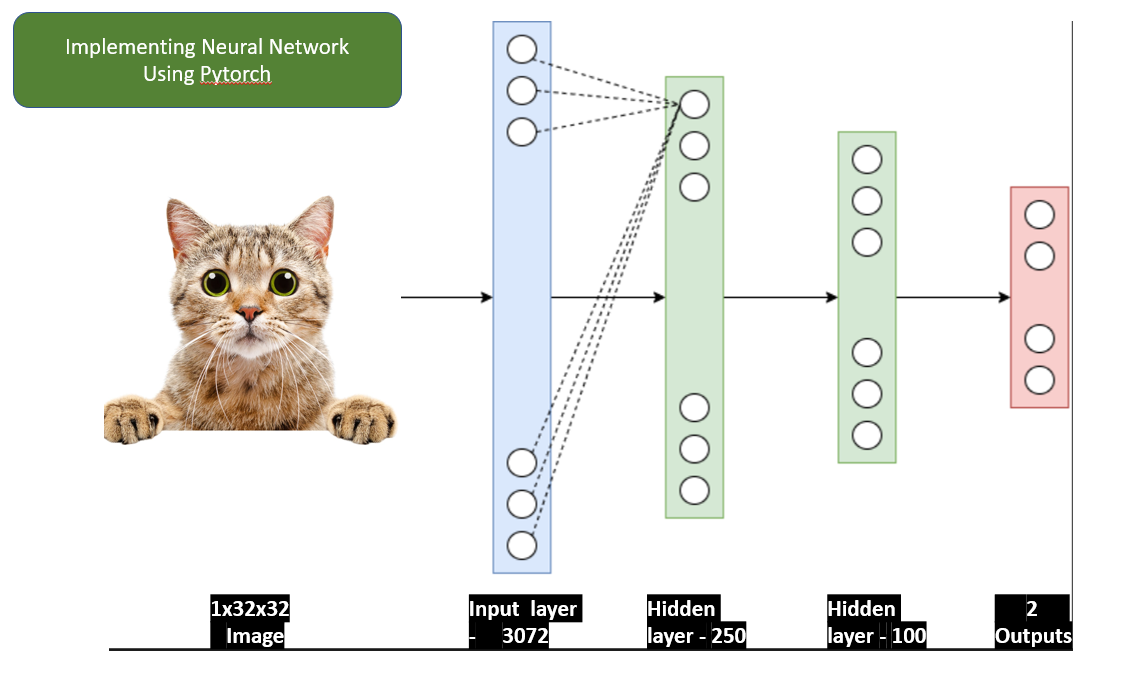

We'll process the dataset, build our model and then train our model. Afterwards we'll do a short dive into what the model has actually learned.

### Data Processing

Let's start by importing all of the modules we'll need. The main ones we need to import are:
- torch for general PyTorch functionality
- torch.nn and torch.nn.functional for neural network based functions
- torch.optim for our optimizer which will update the parameters of our neural network
- torch.utils.data for handling the dataset
- torchvision.transforms for data augmentation
- torchvision.datasets for loading the dataset
- sklearn's metrics for visualizing a confusion matrix
- sklearn's decomposition and manifold for visualizing the neural network's representations in two dimensions
- matplotlib for plotting

## Imports

In [65]:
from collections import Counter
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
import tarfile
from tqdm.notebook import tqdm
import warnings

In [66]:
def extract_tar(file, path):
    """
    function to extract tar.gz files to specified location
    
    Args:
        file (str): path where the file is located
        path (str): path where you want to extract
    """
    with tarfile.open(file) as tar:
        files_extracted = 0
        for member in tqdm(tar.getmembers()):
            if os.path.isfile(path + member.name[1:]):
                continue
            else:
                tar.extract(member, path)
                files_extracted += 1
        tar.close()
        if files_extracted < 3:
            print('Files already exist')

In [71]:
path = 'images/'

extract_tar('/content/drive/MyDrive/AML_Project/cadod.tar.gz', path)

  0%|          | 0/25936 [00:00<?, ?it/s]

Files already exist


In [73]:
df = pd.read_csv('/content/drive/MyDrive/AML_Project/cadod.csv')

In [74]:
df.head()

ImageID  Source  LabelName  ...  XClick2Y  XClick3Y  XClick4Y
0  0000b9fcba019d36  xclick  /m/0bt9lr  ...  0.506667  0.998333  0.661667
1  0000cb13febe0138  xclick  /m/0bt9lr  ...  0.410882  0.999062  0.999062
2  0005a9520eb22c19  xclick  /m/0bt9lr  ...  0.226296  0.998736  0.305942
3  0006303f02219b07  xclick  /m/0bt9lr  ...  0.375294  0.720000  0.998824
4  00064d23bf997652  xclick  /m/0bt9lr  ...  0.370000  0.424286  0.694286

[5 rows x 21 columns]

In [75]:
df.head()

ImageID  Source  LabelName  ...  XClick2Y  XClick3Y  XClick4Y
0  0000b9fcba019d36  xclick  /m/0bt9lr  ...  0.506667  0.998333  0.661667
1  0000cb13febe0138  xclick  /m/0bt9lr  ...  0.410882  0.999062  0.999062
2  0005a9520eb22c19  xclick  /m/0bt9lr  ...  0.226296  0.998736  0.305942
3  0006303f02219b07  xclick  /m/0bt9lr  ...  0.375294  0.720000  0.998824
4  00064d23bf997652  xclick  /m/0bt9lr  ...  0.370000  0.424286  0.694286

[5 rows x 21 columns]

In [76]:
df.columns

Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside', 'XClick1X', 'XClick2X', 'XClick3X', 'XClick4X', 'XClick1Y',
       'XClick2Y', 'XClick3Y', 'XClick4Y'],
      dtype='object')

In [77]:
df.LabelName.replace({'/m/01yrx':'cat', '/m/0bt9lr':'dog'}, inplace=True)

In [78]:
img_shape = []
img_size = np.zeros((df.shape[0], 1))

for i,f in enumerate(tqdm(glob.glob1(path, '*.jpg'))):
    file = path+'/'+f
    img = Image.open(file)
    img_shape.append(f"{img.size[0]}x{img.size[1]}")
    img_size[i] += os.path.getsize(file)

  0%|          | 0/12966 [00:00<?, ?it/s]

In [79]:
!mkdir -p images/resized

In [80]:
# from torch.utils.data import DataLoader, Dataset
# import torchvision.transforms as T
# import torch
# import torch.nn as nn
# from torchvision.utils import make_grid
# from torchvision.utils import save_image
# # from IPython.display import Image
# import matplotlib.pyplot as plt
# import numpy as np
# import random

In [81]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets

from sklearn import metrics
from sklearn import decomposition
from sklearn import manifold
import matplotlib.pyplot as plt
import numpy as np

import copy
import random
import time

In [82]:

# resize image and save, convert to numpy

img_arr = np.zeros((df.shape[0],32*32*3)) # initialize np.array
# mean=[]
# std=[]
for i, f in enumerate(tqdm(df.ImageID)):
    img = Image.open(path+f+'.jpg')
    img_resized = img.resize((32,32))
    img_resized.save("images/resized/"+f+'.jpg', "JPEG", optimize=True)
    img_arr[i] = np.asarray(img_resized, dtype=np.uint8).flatten()
    # mean.append(np.asarray(img_resized, dtype=np.uint8).flatten().mean()/255)
    # std.append(np.asarray(img_resized, dtype=np.uint8).flatten().std()/255)
    

  0%|          | 0/12966 [00:00<?, ?it/s]

In [84]:
# encode labels
df['Label'] = (df.LabelName == 'dog').astype(np.uint8)

In [85]:
df.columns

Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside', 'XClick1X', 'XClick2X', 'XClick3X', 'XClick4X', 'XClick1Y',
       'XClick2Y', 'XClick3Y', 'XClick4Y', 'Label'],
      dtype='object')

## Spliting Data Into Train and Test

In [86]:
#spliting the data into train test data 
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img_arr, df['Label'], test_size=0.33, random_state=42)

### Normalization by Subtracting Mean and Dividing with Standard Deviation

In [87]:
#Normalizing the pixel values by substracting with mean and didviding with standard devaiation
mean_train=[]
std_train=[]
for i in range(len(X_train)):
  #appending mean of every image to mean_train list
  mean_train.append(np.array(X_train[i], dtype=np.uint8).flatten().mean()/255)
   #appending mean of every image to std_train list
  std_train.append(np.array(X_train[i], dtype=np.uint8).flatten().std()/255)

mean_test=[]
std_test=[]
for i in range(len(X_test)):
  mean_test.append(np.array(X_test[i], dtype=np.uint8).flatten().mean()/255)
  std_test.append(np.array(X_test[i], dtype=np.uint8).flatten().std()/255)



In [88]:
#normalizing part 2
my_train_data=[]
my_test_data=[]
for i in range(len(X_train)):
  my_train_data.append(
      (
      torch.tensor(
          np.round(
              (((X_train[i]/255)-mean_train[i])/std_train[i]),5              
              ).astype(np.float32)
          ),
       int(y_train.tolist()[i])
       )
      )

for i in range(len(X_test)):  
  my_test_data.append(
      (
      torch.tensor(
          np.round(
              (((X_test[i]/255)-mean_test[i])/std_test[i]),5              
              ).astype(np.float32)
          ),
       int(y_test.tolist()[i])
       )
      )


## Spliting Data Into Train and Validation

In [89]:
#spliting the train data into train validation split
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(my_train_data, y_train, test_size=0.33, random_state=42)

In [90]:
train_data=X_train
valid_data=X_val
test_data=my_test_data

In [91]:
#visualizing the sample sizes
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 5820
Number of validation examples: 2867
Number of testing examples: 4279


In [92]:
#visualising one tensor
X_train[0]

(tensor([-0.9506, -1.4124, -1.2007,  ..., -0.4117, -0.9121, -0.7774]), 1)

To ensure we get reproducible results we set the random seed for Python, Numpy and PyTorch.

In [93]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

Now we have defined our transforms we can then load the train and test data with the relevant transforms defined.

In [94]:
(my_train_data[0])

(tensor([ 0.4145,  0.4442, -0.1951,  ...,  0.0279,  0.1915, -0.4032]), 1)

Next, we'll define a `DataLoader` for each of the training/validation/test sets. We can iterate over these and they will yield batches of images and labels which we can use to train our model.

We only need to shuffle our training set as it will be used for stochastic gradient descent and we want the each batch to be different between epochs. As we aren't using the validation or test sets to update our model parameters they do not need to be shuffled.

Ideally, we want to use the biggest batch size that we can. The 64 here is relatively small and can be increased if our hardware can handle it.

In [95]:
#In order to take a batch of 500 images at once  , we are making use of data loader for train, test and valid data 
BATCH_SIZE = 500

train_iterator = data.DataLoader(train_data, 
                                 shuffle = True, 
                                 batch_size = BATCH_SIZE)

valid_iterator = data.DataLoader(valid_data, 
                                 batch_size = BATCH_SIZE)

test_iterator = data.DataLoader(test_data, 
                                batch_size = BATCH_SIZE)

# MLP Model For Image Classification With Out Using Drop Out:

In [96]:
#Model: Our model has four  layers input dim=3072, hidden layer one=250, hidden layer two =100, output layer=2

class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
                
        self.input_fc = nn.Linear(input_dim, 250)
        self.hidden_fc = nn.Linear(250, 100)
        self.output_fc = nn.Linear(100, output_dim)
        #self.output_fc_c = nn.Linear(100, 1)
        #self.output_fc_r = nn.Linear(100, 4)
    def forward(self, x):
        
        #x = [batch size, height, width]
        
        batch_size = x.shape[0]

        x = x.view(batch_size, -1)
        
        #x = [batch size, height * width]
        
        h_1 = F.relu(self.input_fc(x))
        
        #h_1 = [batch size, 250]

        h_2 = F.relu(self.hidden_fc(h_1))

        #h_2 = [batch size, 100]

        y_pred = self.output_fc(h_2)
        #y_pred2=self.output_fc_r(h_2)
        #y_pred = [batch size, output dim]
        
        return y_pred, h_2

We'll define our model by creating an instance of it and setting the correct input and output dimensions.

In [97]:
#defining the input and out put dimesnsions 
INPUT_DIM = 32 * 32 *3
OUTPUT_DIM = 2
#creating an object for classification model 
model = MLP(INPUT_DIM, OUTPUT_DIM)

We can also create a small function to calculate the number of trainable parameters (weights and biases) in our model - in case all of our parameters are trainable.

In [98]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

The first layer has 3072 neurons connected to 250 neurons, so 3072*250 weighted connections plus 250 bias terms.

The second layer has 250 neurons connected to 100 neurons, 250*100 weighted connections plus 100 bias terms.

The third layer has 100 neurons connected to 2 neurons, 100*2 weighted connections plus 10 bias terms.


$$3072 \cdot 250 + 250 + 250 \cdot 100 + 100 + 100 \cdot 2 + 2= 222,360 $$

In [99]:
print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 793,552 trainable parameters


## Training the Model

Next, we'll define our optimizer. This is the algorithm we will use to update the parameters of our model with respect to the loss calculated on the data.

We aren't going to go into too much detail on how neural networks are trained (see [this](http://neuralnetworksanddeeplearning.com/) article if you want to know how) but the gist is:
- pass a batch of data through your model
- calculate the loss of your batch by comparing your model's predictions against the actual labels
- calculate the gradient of each of your parameters with respect to the loss
- update each of your parameters by subtracting their gradient multiplied by a small *learning rate* parameter

We use the *Adam* algorithm with the default parameters to update our model. Improved results could be obtained by searching over different optimizers and learning rates, however default Adam is usually a good starting off point. Check out [this](https://ruder.io/optimizing-gradient-descent/) article if you want to learn more about the different optimization algorithms commonly used for neural networks.


In [100]:
optimizer = optim.Adam(model.parameters())

Then, we define a *criterion*, PyTorch's name for a loss/cost/error function. This function will take in your model's predictions with the actual labels and then compute the loss/cost/error of your model with its current parameters.

`CrossEntropyLoss` both computes the *softmax* activation function on the supplied predictions as well as the actual loss via *negative log likelihood*. 

Briefly, the softmax function is:

$$\text{softmax }(\mathbf{x}) = \frac{e^{x_i}}{\sum_j e^{x_j}}$$ 

This turns out 10 dimensional output, where each element is an unbounded real number, into a probability distribution over 10 elements. That is, all values are between 0 and 1, and together they all sum to 1. 

Why do we turn things into a probability distribution? So we can use negative log likelihood for our loss function as it expects probabilities. PyTorch calculates negative log likelihood for a single example via:

$$\text{negative log likelihood }(\mathbf{\hat{y}}, y) = -\log \big( \text{softmax}(\mathbf{\hat{y}})[y] \big)$$

$\mathbf{\hat{y}}$ is the $\mathbb{R}^{10}$ output, from our neural network, whereas $y$ is the label, an integer representing the class. The loss is the negative log of the class index of the softmax. For example:

$$\mathbf{\hat{y}} = [5,1,1,1,1,1,1,1,1,1]$$

$$\text{softmax }(\mathbf{\hat{y}}) = [0.8585, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157]$$

If the label was class zero, the loss would be:

$$\text{negative log likelihood }(\mathbf{\hat{y}}, 0) = - \log(0.8585) = 0.153 \dots$$

If the label was class five, the loss would be:

$$\text{negative log likelihood }(\mathbf{\hat{y}}, 5) = - \log(0.0157) = 4.154 \dots$$

So, intuitively, as your model's output corresponding to the correct class index increases your loss decreases.

In [101]:
#tTaking Cross Entrphy Loss
criterion = nn.CrossEntropyLoss()

We then define `device`. This is used to place your model and data on to a GPU, if you have one.

In [102]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

We place our model and criterion on to the device by using the `.to` method.

In [103]:
model = model.to(device)
criterion = criterion.to(device)


Next, we'll define a function to calculate the accuracy of our model. This takes the index of the highest value for your prediction and compares it against the actual class label. We then divide how many our model got correct by the amount in the batch to calculate accuracy across the batch.

In [104]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim = True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

We finally define our training loop.

This will:
- put our model into `train` mode
- iterate over our dataloader, returning batches of (image, label)
- place the batch on to our GPU, if we have one
- clear the gradients calculated from the last batch
- pass our batch of images, `x`, through to model to get predictions, `y_pred`
- calculate the loss between our predictions and the actual labels
- calculate the accuracy between our predictions and the actual labels
- calculate the gradients of each parameter
- update the parameters by taking an optimizer step
- update our metrics

Some layers act differently when training and evaluating the model that contains them, hence why we must tell our model we are in "training" mode. The model we are using here does not use any of those layers, however it is good practice to get used to putting your model in training mode.

In [105]:
#Training the model by passing model, train iterator to iterator, optimser as adams, criterion as CXE
def train(model, iterator, optimizer, criterion, device):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for (x, y) in iterator:
        
        x = x.to(device)
        y = y.to(device)
        #y2= 4 elements for reg
        optimizer.zero_grad()
                
        y_pred, _ = model(x)
        
        loss = criterion(y_pred, y)
        #loss2=(ypred2,y2)
        # print(loss+loss,"\n",loss.item())
        acc = calculate_accuracy(y_pred, y)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

The evaluation loop is similar to the training loop. The differences are:
- we put our model into evaluation mode with `model.eval()`
- we wrap the iterations inside a `with torch.no_grad()`
- we do not zero gradients as we are not calculating any
- we do not calculate gradients as we are not updating parameters
- we do not take an optimizer step as we are not calculating gradients

`torch.no_grad()` ensures that gradients are not calculated for whatever is inside the `with` block. As our model will not have to calculate gradients it will be faster and use less memory. 

In [106]:
#We stop training and start evaluating the model
def evaluate(model, iterator, criterion, device):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        
        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x.float())

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

The final step before training is to define a small function to tell us how long an epoch took.

In [107]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

We're finally ready to train!

During each epoch we calculate the training loss and accuracy, followed by the validation loss and accuracy. We then check if the validation loss achieved is the best validation loss we have seen. If so, we save our model's parameters (called a `state_dict`).

In [108]:
#This is where we call the train and evaluate functions to actually evaluate the model
EPOCHS = 10

best_valid_loss = float('inf')

for epoch in range(EPOCHS):
    
    start_time = time.monotonic()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut1-model.pt')
    
    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 0s
	Train Loss: 0.693 | Train Acc: 55.41%
	 Val. Loss: 0.695 |  Val. Acc: 55.53%
Epoch: 02 | Epoch Time: 0m 0s
	Train Loss: 0.647 | Train Acc: 61.86%
	 Val. Loss: 0.690 |  Val. Acc: 56.10%
Epoch: 03 | Epoch Time: 0m 0s
	Train Loss: 0.603 | Train Acc: 67.14%
	 Val. Loss: 0.689 |  Val. Acc: 56.72%
Epoch: 04 | Epoch Time: 0m 0s
	Train Loss: 0.552 | Train Acc: 72.49%
	 Val. Loss: 0.703 |  Val. Acc: 56.93%
Epoch: 05 | Epoch Time: 0m 0s
	Train Loss: 0.494 | Train Acc: 77.36%
	 Val. Loss: 0.751 |  Val. Acc: 56.86%
Epoch: 06 | Epoch Time: 0m 0s
	Train Loss: 0.440 | Train Acc: 80.29%
	 Val. Loss: 0.774 |  Val. Acc: 55.93%
Epoch: 07 | Epoch Time: 0m 0s
	Train Loss: 0.365 | Train Acc: 85.55%
	 Val. Loss: 0.843 |  Val. Acc: 54.54%
Epoch: 08 | Epoch Time: 0m 0s
	Train Loss: 0.302 | Train Acc: 89.53%
	 Val. Loss: 0.893 |  Val. Acc: 55.30%
Epoch: 09 | Epoch Time: 0m 0s
	Train Loss: 0.232 | Train Acc: 92.54%
	 Val. Loss: 0.972 |  Val. Acc: 56.32%
Epoch: 10 | Epoch Time: 0m 0

Afterwards, we load our the parameters of the model that achieved the best validation loss and then use this to evaluate our model on the test set.

In [109]:
model.load_state_dict(torch.load('tut1-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion, device)

Our model achieves 55.93
% accuracy on the test set.

This can be improved by tweaking hyperparameters, e.g. number of layers, number of neurons per layer, optimization algorithm used, learning rate, etc. 

In [110]:
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.701 | Test Acc: 55.93%


In [114]:
experiment_results = pd.DataFrame(columns=["Model_name","Test_Accuracy","Test_Loss","Parameters"])

In [115]:
from IPython.display import display, HTML

def wrap_df_text(experiment_results):
    return display(HTML(experiment_results.to_html().replace("\\n","<br>")))

experiment_results['Parameters'] = experiment_results['Parameters'].str.wrap(30)


In [116]:
exp_name = f"MLP Classification without Drop out"
parameters = f"Optimizer:Adam,Activaton:Relu,HiddenLayer:2+,Loss:CXE"
experiment_results.loc[0,:10]  = [f"{exp_name}"]+list([np.round(test_acc*100,3),np.round(test_loss,3),parameters])

wrap_df_text(experiment_results)

### Examining the Model

Now we've trained our model there's a few things we can look at. Most of these are simple exploratory analysis, but they can offer some insights into your model.

An important thing to do is check what examples your model gets wrong and ensure that they're reasonable mistakes.

The function below will return the model's predictions over a given dataset. It will return the inputs (image) the outputs (model predictions) and the ground truth labels.

In [117]:
def get_predictions(model, iterator, device):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim = -1)
            top_pred = y_prob.argmax(1, keepdim = True)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim = 0)
    labels = torch.cat(labels, dim = 0)
    probs = torch.cat(probs, dim = 0)

    return images, labels, probs

We can then get these predictions and, by taking the index of the highest predicted probability, get the predicted labels.

In [118]:
images, labels, probs = get_predictions(model, test_iterator, device)

pred_labels = torch.argmax(probs, 1)

Then, we can make a confusion matrix from our actual labels and our predicted labels.

In [119]:
def plot_confusion_matrix(labels, pred_labels):
    
    fig = plt.figure(figsize = (10, 10));
    ax = fig.add_subplot(1, 1, 1);
    cm = metrics.confusion_matrix(labels, pred_labels);
    cm = metrics.ConfusionMatrixDisplay(cm, display_labels = range(10));
    cm.plot(values_format = 'd', cmap = 'Blues', ax = ax)

The results seem reasonable enough, the most confused predictions-actuals are: 3-5 and 2-7.

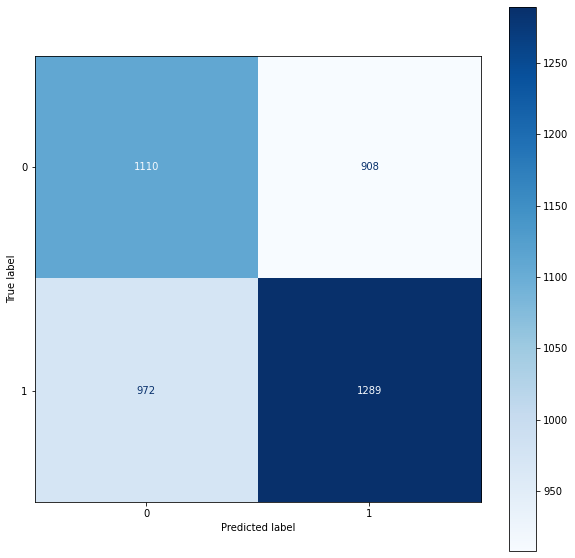

In [120]:
plot_confusion_matrix(labels, pred_labels)

Next, for each of our examples, we can check if our predicted label matches our actual label.

In [121]:
corrects = torch.eq(labels, pred_labels)

We can then loop through all of the examples over our model's predictions and store all the examples the model got incorrect into an array.

Then, we sort these incorrect examples by how confident they were, with the most confident being first.

In [122]:
incorrect_examples = []

for image, label, prob, correct in zip(images, labels, probs, corrects):
    if not correct:
        incorrect_examples.append((image, label, prob))

incorrect_examples.sort(reverse = True, key = lambda x: torch.max(x[2], dim = 0).values)

We can then plot the incorrectly predicted images along with how confident they were on the actual label and how confident they were at the incorrect label.

In [123]:
def plot_most_incorrect(incorrect, n_images):

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize = (20, 10))
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        image, true_label, probs = incorrect[i]
        true_prob = probs[true_label]
        incorrect_prob, incorrect_label = torch.max(probs, dim = 0)
        ax.imshow(image.view(28, 28).cpu().numpy(), cmap='bone')
        ax.set_title(f'true label: {true_label} ({true_prob:.3f})\n' \
                     f'pred label: {incorrect_label} ({incorrect_prob:.3f})')
        ax.axis('off')
    fig.subplots_adjust(hspace= 0.5)

In [124]:
# N_IMAGES = 25

# plot_most_incorrect(incorrect_examples, N_IMAGES)

Another thing we can do is get the output and intermediate representations from the model and try to visualize them.

The function below loops through the provided dataset and gets the output from the model and the intermediate representation from the layer before that, the second hidden layer.

In [125]:
def get_representations(model, iterator, device):

    model.eval()

    outputs = []
    intermediates = []
    labels = []

    with torch.no_grad():
        
        for (x, y) in iterator:

            x = x.to(device)

            y_pred, h = model(x)

            outputs.append(y_pred.cpu())
            intermediates.append(h.cpu())
            labels.append(y)
        
    outputs = torch.cat(outputs, dim = 0)
    intermediates = torch.cat(intermediates, dim = 0)
    labels = torch.cat(labels, dim = 0)

    return outputs, intermediates, labels

We run the function to get the representations.

In [126]:
outputs, intermediates, labels = get_representations(model, train_iterator, device)

The data we want to visualize is in ten dimensions and 100 dimensions. We want to get this down to two dimensions so we can actually plot it. 

The first technique we'll use is PCA (principal component analysis). First, we'll define a function to calculate the PCA of our data and then we'll define a function to plot it.

In [127]:
def get_pca(data, n_components = 2):
    pca = decomposition.PCA()
    pca.n_components = n_components
    pca_data = pca.fit_transform(data)
    return pca_data

In [128]:
def plot_representations(data, labels, n_images = None):
    if n_images is not None:
        data = data[:n_images]
        labels = labels[:n_images]
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(data[:, 0], data[:, 1], c = labels, cmap = 'tab10')
    handles, labels = scatter.legend_elements()
    legend = ax.legend(handles = handles, labels = labels)

First, we plot the representations from the ten dimensional output layer, reduced down to two dimensions.

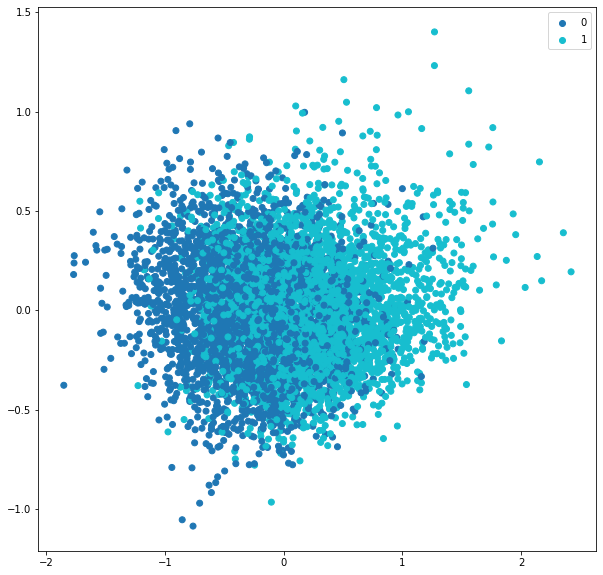

In [129]:
output_pca_data = get_pca(outputs)
plot_representations(output_pca_data, labels)

Next, we'll plot the outputs of the second hidden layer. 

The clusters seem similar to the one above. In fact if we rotated the below image anti-clockwise it wouldn't be too far off the PCA of the output representations.

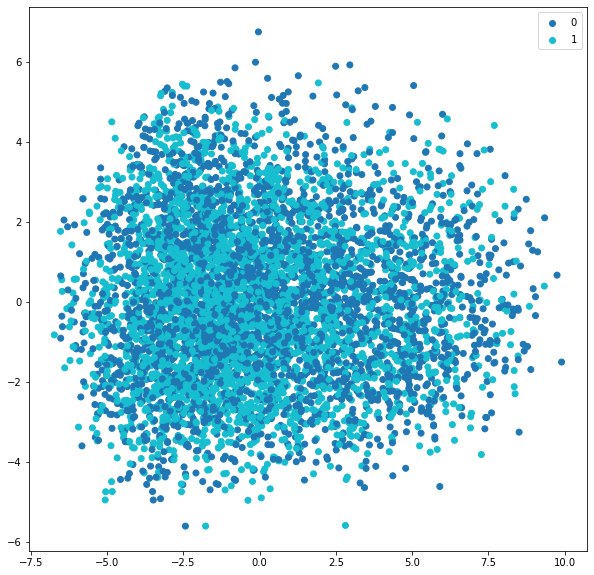

In [130]:
intermediate_pca_data = get_pca(intermediates)
plot_representations(intermediate_pca_data, labels)

An alternative to PCA is t-SNE (t-distributed stochastic neighbor embedding). 

This is commonly thought of as being "better" than PCA, although it can be [misinterpreted](https://distill.pub/2016/misread-tsne/).

In [131]:
def get_tsne(data, n_components = 2, n_images = None):
    if n_images is not None:
        data = data[:n_images]
    tsne = manifold.TSNE(n_components = n_components, random_state = 0)
    tsne_data = tsne.fit_transform(data)
    return tsne_data

t-SNE is very slow, so we only compute it on a subset of the representations.

The classes look very well separated, and it is possible to use [k-NN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) on this representation to achieve decent accuracy.

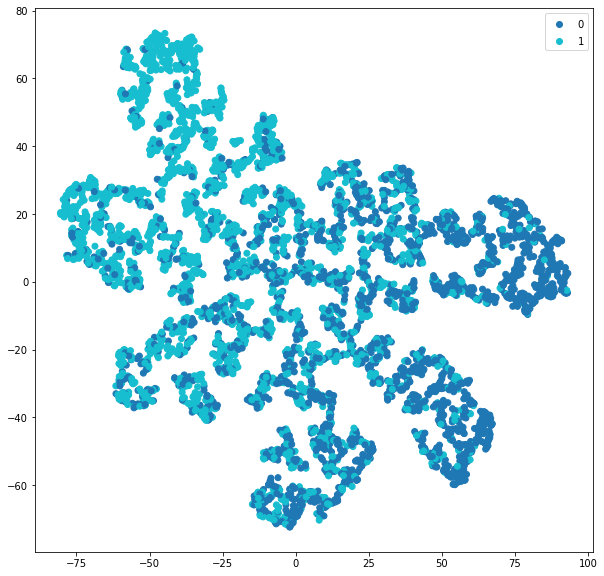

In [132]:
N_IMAGES = 5_000

output_tsne_data = get_tsne(outputs, n_images = N_IMAGES)
plot_representations(output_tsne_data, labels, n_images = N_IMAGES)

We plot the intermediate representations on the same subset.

Again, the classes look well separated, though less so than the output representations. This is because these representations are intermediate features that the neural network has extracted and will use them in further layers to weigh up the evidence of what digit is in the image. Hence, in theory, the classes should become more separated the closer we are to the output layer, which is exactly what we see here.

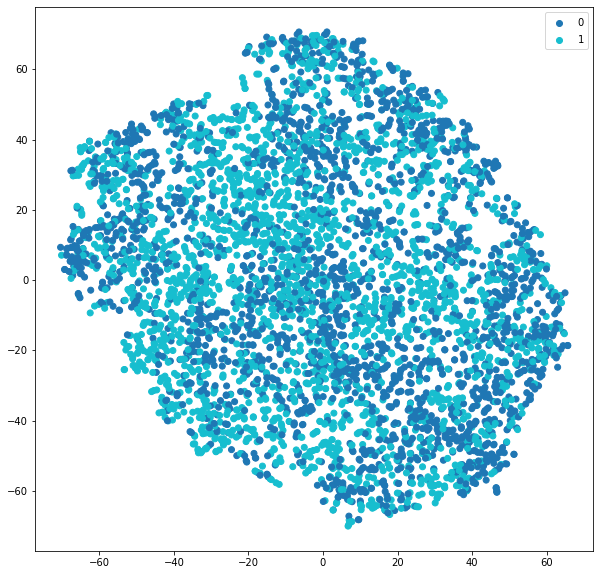

In [133]:
intermediate_tsne_data = get_tsne(intermediates, n_images = N_IMAGES)
plot_representations(intermediate_tsne_data, labels, n_images = N_IMAGES)

Another experiment we can do is try and generate fake digits. 

The function below will repeatedly generate random noise and feed it through the model and find the most confidently generated digit for the desired class.

In [134]:
def imagine_digit(model, digit, device, n_iterations = 50_000):

    model.eval()
    
    best_prob = 0
    best_image = None

    with torch.no_grad():
    
        for _ in range(n_iterations):

            x = torch.randn(32, 28, 28).to(device)

            y_pred, _ = model(x)

            preds = F.softmax(y_pred, dim = -1)

            _best_prob, index = torch.max(preds[:,digit], dim = 0)

            if _best_prob > best_prob:
                best_prob = _best_prob
                best_image = x[index]

    return best_image, best_prob

Finally, we can plot the weights in the first layer of our model. 

The hope is that there's maybe one neuron in this first layer that's learned to look for certain patterns in the input and thus has high weight values indicating this pattern. If we then plot these weights we should see these patterns.

In [135]:
def plot_weights(weights, n_weights):

    rows = int(np.sqrt(n_weights))
    cols = int(np.sqrt(n_weights))

    fig = plt.figure(figsize = (20, 10))
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(weights[i].view(28, 28).cpu().numpy(), cmap = 'bone')
        ax.axis('off')

Looking at these weights we see a few of them look like random noise but some of them do have weird patterns within them. These patterns show "ghostly" image looking shapes, but are clearly not images.

### Conclusions

In this notebook we have shown: 
- loading Torchvision datasets
- defining a MLP
- training a model to achieve >55.93% accuracy
- viewing our model's mistakes
- visualizing our data in lower dimensions with PCA and t-SNE

In the next notebook we'll implement a convolutional neural network (CNN) and evaluate it on the MNIST dataset.

# MLP Model For Regression Models
Build another PyTorch model for regression  (using a multilayer perceptron (MLP)) with 4 target values [y_1, y_2, y_3, y_4] corresponding to [x, y, w, h] of the bounding box containing the object of interest).

In [136]:
# resize image and save, convert to numpy

img_arr_reg = [] # initialize np.array

for i, f in enumerate(tqdm(df.ImageID)):
    img = Image.open(path+f+'.jpg')
    img_resized = img.resize((32,32))
    img_resized.save("images/resized/"+f+'.jpg', "JPEG", optimize=True)
    img_arr_reg.append( np.asarray(img_resized, dtype=np.uint8))

  0%|          | 0/12966 [00:00<?, ?it/s]

In [137]:
df.columns

Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside', 'XClick1X', 'XClick2X', 'XClick3X', 'XClick4X', 'XClick1Y',
       'XClick2Y', 'XClick3Y', 'XClick4Y', 'Label'],
      dtype='object')

In [138]:
mkdir -p data

In [139]:
np.save('data/y_bbox.npy', df[['XMin', 'YMin', 'XMax', 'YMax']].values.astype(np.float32))

In [140]:
y_bbox = np.load('data/y_bbox.npy', allow_pickle=True)

In [141]:
#bounding box dimensions which are to be predicted
y_bbox

array([[0.165   , 0.268333, 0.90375 , 0.998333],
       [0.      , 0.      , 0.651875, 0.999062],
       [0.094167, 0.055626, 0.611667, 0.998736],
       ...,
       [0.001475, 0.042406, 0.988201, 0.62426 ],
       [0.      , 0.037523, 0.998125, 0.999062],
       [0.148045, 0.07064 , 0.999069, 0.94702 ]], dtype=float32)

### Spliting Data Into Train And Test

In [142]:
#splitting the data into test train splits 
import numpy as np
from sklearn.model_selection import train_test_split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(np.array(img_arr_reg)/255,y_bbox, test_size=0.33, random_state=42)

In [143]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler

In [144]:
class Dataset(torch.utils.data.Dataset):
  '''
  Prepare the Boston dataset for regression
  '''

  def __init__(self, X, y, scale_data=True):
    if not torch.is_tensor(X) and not torch.is_tensor(y):
      # Apply scaling if necessary
      #if scale_data:
       #   X = StandardScaler().fit_transform(X)
      self.X = torch.from_numpy(X)
      self.y = torch.from_numpy(y)

  def __len__(self):
      return len(self.X)

  def __getitem__(self, i):
      return self.X[i], self.y[i]

In [145]:
#CREATING A NN with sequential in pytorch with input_dim=3072, hidden layer 1 dim= 250, hidden layer 2 dim=100, output layer:4
class MLP1(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(3072,250),
      nn.ReLU(),
      nn.Linear(250, 100),
      nn.ReLU(),
      nn.Linear(100, 4)
    )


  def forward(self, x):
    '''
      Forward pass
    '''
    return self.layers(x)

In [146]:
mean_loss=[]

In [147]:
#we call the model, train the model , measure the model every epoch by loss
if __name__ == '__main__':
  
  # Set fixed random number seed
  torch.manual_seed(42)
  
  # Load Boston dataset
  X, y = X_train_r,y_train_r
  
  # Prepare Boston dataset
  
  dataset = Dataset(np.array(X), np.array(y))
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=500, shuffle=True, num_workers=1)
  
  # Initialize the MLP
  mlp = MLP1()
  
  # Define the loss function and optimizer
  loss_function = nn.L1Loss()
  optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)
  
  # Run the training loop
  for epoch in range(0, 20): # 5 epochs at maximum
    
    # Print epoch
    print(f'Starting epoch {epoch+1}')
    
    # Set current loss value
    current_loss = 0.0
    train_count,train_loss=0,0
    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader,0):
      
      # Get and prepare inputs
      inputs, targets = data
      inputs, targets = inputs.float(), targets.float()
      #targets = targets.reshape((targets.shape[0], 1))
      
      # Zero the gradients
      optimizer.zero_grad()
      loss = 0
      # Perform forward pass
      for num in range(len(inputs)):
        outputs=mlp(inputs[num].flatten())
        # Compute loss
        loss += loss_function(outputs, targets[num])/500
        
      
      # Perform backward pass
      loss.backward()
      
      # Perform optimization
      optimizer.step()
      
      # Print statistics
      train_loss += loss.item()
      #print(train_loss)
      train_count+=1
      # if i % 10 == 0:
      #     print('Loss after mini-batch %5d: %.3f' %
      #           (i + 1, current_loss ))
      #     mean_loss.append(current_loss)
      #     current_loss = 0.0
    print(train_loss/train_count)

  # Process is complete.
  print('Training process has finished.')

Starting epoch 1
0.2078897510137823
Starting epoch 2
0.13889307797782952
Starting epoch 3
0.1308961429943641
Starting epoch 4
0.1270570307970047
Starting epoch 5
0.12442695080406135
Starting epoch 6
0.1220286109795173
Starting epoch 7
0.1199258305132389
Starting epoch 8
0.11825432214472029
Starting epoch 9
0.11655832868483332
Starting epoch 10
0.11532921488914225
Starting epoch 11
0.11409979831013414
Starting epoch 12
0.11258601935373412
Starting epoch 13
0.1111256502982643
Starting epoch 14
0.11000728834834364
Starting epoch 15
0.10932950282262431
Starting epoch 16
0.10754976669947307
Starting epoch 17
0.107028609348668
Starting epoch 18
0.10570604250662857
Starting epoch 19
0.10458212697671519
Starting epoch 20
0.10318754965232478
Training process has finished.


In [148]:
#we call the model, test the model , measure the model every epoch by loss
mean_loss_test=[]
# Set fixed random number seed
torch.manual_seed(42)

# Load Boston dataset
X, y = X_test_r,y_test_r

# Prepare Boston dataset

dataset = Dataset(np.array(X), np.array(y))
testloader = torch.utils.data.DataLoader(dataset, batch_size=500, shuffle=True, num_workers=1)

# Initialize the MLP
# mlp = MLP()

# Define the loss function and optimizer
# loss_function = nn.L1Loss()
# optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

# Run the training loop
for epoch in range(0, 1): # 5 epochs at maximum
  
  # Print epoch
  print(f'test loss')
  
  # Set current loss value
  current_loss = 0.0
  count=0
  test_loss=0
  # Iterate over the DataLoader for training data
  for i, data in enumerate(testloader,0):
    
    # Get and prepare inputs
    inputs, targets = data
    inputs, targets = inputs.float(), targets.float()
    #targets = targets.reshape((targets.shape[0], 1))
    
    # Zero the gradients
    # optimizer.zero_grad()
    loss = 0
    # Perform forward pass
    for num in range(len(inputs)):
      #outputs = []
      outputs=mlp(inputs[num].flatten())
      # Compute loss
      loss += loss_function(outputs, targets[num])/500
      
      
    
    # Perform backward pass
    # loss.backward()
    
    # Perform optimization
    # optimizer.step()
    count+=1
    # Print statistics
    test_loss += loss.item()
    #print(loss.item())
    # if i % 10 == 0:
    #     print('Loss after mini-batch %5d: %.3f' %
    #           (i + 1, current_loss ))
    #     mean_loss_test.append(current_loss)
    #     current_loss = 0.0
  print(test_loss/count)

test loss
0.10604933318164614


In [149]:
test_loss = test_loss/count

In [150]:
exp_name = f"MLP Regression without Drop out"
parameters = f"Optimizer:Adam with lr=1e-4,Activaton:Relu,HiddenLayer:2,Loss:MSE"
experiment_results.loc[len(experiment_results)]  = [f"{exp_name}"]+list(['NAN',np.round(test_loss,3),parameters])

wrap_df_text(experiment_results)

# Multi head detector
### Build a multi-headed cat-dog detector using the OOP API in PyTorch with a combined loss function: CXE + MSE.

In [151]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets

from sklearn import metrics
from sklearn import decomposition
from sklearn import manifold
import matplotlib.pyplot as plt
import numpy as np

import copy
import random
import time

In [152]:

# resize image and save, convert to numpy

img_arr = np.zeros((df.shape[0],32*32*3)) # initialize np.array
# mean=[]
# std=[]
for i, f in enumerate(tqdm(df.ImageID)):
    img = Image.open(path+f+'.jpg')
    img_resized = img.resize((32,32))
    img_resized.save("images/resized/"+f+'.jpg', "JPEG", optimize=True)
    img_arr[i] = np.asarray(img_resized, dtype=np.uint8).flatten()
    # mean.append(np.asarray(img_resized, dtype=np.uint8).flatten().mean()/255)
    # std.append(np.asarray(img_resized, dtype=np.uint8).flatten().std()/255)
    

  0%|          | 0/12966 [00:00<?, ?it/s]

In [153]:
#spliting the data into train and test 
import numpy as np
from sklearn.model_selection import train_test_split
X_train_mh, X_test_mh, y_train_mh, y_test_mh = train_test_split(img_arr, df[['Label', 'XMin', 'XMax', 'YMin','YMax']], test_size=0.33, random_state=42)

In [154]:
y_train_mh['Label'].tolist()[0]

1

In [155]:
#normalizing all the pixels by subtracting with mean and sd of that image 
mean_train_mh=[]
std_train_mh=[]
for i in range(len(X_train_mh)):
  mean_train_mh.append(np.array(X_train_mh[i], dtype=np.uint8).flatten().mean()/255)
  std_train_mh.append(np.array(X_train_mh[i], dtype=np.uint8).flatten().std()/255)
# final_mean_train=np.array(mean_train).mean()
# final_std_train=np.array(std_train).mean()
mean_test_mh=[]
std_test_mh=[]
for i in range(len(X_test_mh)):
  mean_test_mh.append(np.array(X_test_mh[i], dtype=np.uint8).flatten().mean()/255)
  std_test_mh.append(np.array(X_test_mh[i], dtype=np.uint8).flatten().std()/255)

# final_mean_test=np.array(mean_test).mean()
# final_std_test=np.array(std_test).mean()

In [156]:
#noramilizing the test train data 
my_train_data_mh=[]

for i in range(len(X_train_mh)):
  my_train_data_mh.append(
      (
      torch.tensor(
          np.round(
              (((X_train_mh[i]/255)-mean_train_mh[i])/std_train_mh[i]),5              
              ).astype(np.float32)
          ),
       int(y_train_mh['Label'].tolist()[i]),

           torch.tensor([y_train_mh['XMin'].tolist()[i],
            y_train_mh['XMax'].tolist()[i],
            y_train_mh['YMin'].tolist()[i],
            y_train_mh['YMax'].tolist()[i]])
           
       )
      )

In [157]:
my_train_data_mh[0]

(tensor([ 0.4145,  0.4442, -0.1951,  ...,  0.0279,  0.1915, -0.4032]),
 1,
 tensor([0.0000, 0.7650, 0.1038, 0.9992]))

In [158]:
#normalizing and  convert into tensors
my_test_data_mh=[]

for i in range(len(X_test_mh)):
  my_test_data_mh.append(
      (
      torch.tensor(
          np.round(
              (((X_test_mh[i]/255)-mean_test_mh[i])/std_test_mh[i]),5              
              ).astype(np.float32)
          ),
       int(y_test_mh['Label'].tolist()[i]),

           torch.tensor([y_test_mh['XMin'].tolist()[i],
            y_test_mh['XMax'].tolist()[i],
            y_test_mh['YMin'].tolist()[i],
            y_test_mh['YMax'].tolist()[i]])
           
       )
      )

In [159]:
my_test_data_mh[0]

(tensor([-0.5221, -0.7394, -1.0290,  ...,  1.0711,  0.7271,  0.4012]),
 0,
 tensor([0.4102, 0.9990, 0.1259, 0.9122]))

In [160]:
#splitting the train data into valid and train  sets.
import numpy as np
from sklearn.model_selection import train_test_split
X_train_mh, X_val_mh, y_train_mh, y_val_mh = train_test_split(my_train_data_mh, y_train_mh, test_size=0.33, random_state=42)

In [161]:
train_data_mh=X_train_mh
valid_data_mh=X_val_mh
test_data_mh=my_test_data_mh

In [162]:
print(f'Number of training examples: {len(train_data_mh)}')
print(f'Number of validation examples: {len(valid_data_mh)}')
print(f'Number of testing examples: {len(test_data_mh)}')

Number of training examples: 5820
Number of validation examples: 2867
Number of testing examples: 4279


In [163]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [164]:
#spliting the data into batch of 500 each with the help of data loader
BATCH_SIZE = 500

train_iterator_mh = data.DataLoader(train_data_mh, 
                                 shuffle = True, 
                                 batch_size = BATCH_SIZE)

valid_iterator_mh = data.DataLoader(valid_data_mh, 
                                 batch_size = BATCH_SIZE)

test_iterator_mh = data.DataLoader(test_data_mh, 
                                batch_size = BATCH_SIZE)

In [165]:
#This is where we defined the model for Multihead with the same network dimesnions as above.
# we are predicting both the class as well as a bounding box  by giving output  from last hidden layer to two different out put layers
class MLP_mh(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
                
        self.input_fc = nn.Linear(input_dim, 250)
        self.hidden_fc = nn.Linear(250, 100)
        

        # self.output_fc = nn.Linear(100, output_dim)
        self.output_fc_c = nn.Linear(100, 2)
        self.output_fc_r = nn.Linear(100, 4)
    def forward(self, x):
        
        #x = [batch size, height, width]
        
        batch_size = x.shape[0]

        x = x.view(batch_size, -1)
        
        #x = [batch size, height * width]
        
        h_1 = F.relu(self.input_fc(x))
        
        #h_1 = [batch size, 250]

        h_2 = F.relu(self.hidden_fc(h_1))

        #h_2 = [batch size, 100]

        # y_pred = self.output_fc(h_2)
        y_pred_c=self.output_fc_c(h_2)
        y_pred_r=self.output_fc_r(h_2)
        #y_pred = [batch size, output dim]
        
        return y_pred_c,y_pred_r, h_2

In [166]:
#passing the input and output dimenions
INPUT_DIM = 32 * 32 *3
# OUTPUT_DIM = 2
#creating an object for model
model = MLP_mh(INPUT_DIM)

In [167]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [168]:
print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 793,956 trainable parameters


In [169]:
optimizer = optim.Adam(model.parameters())

In [170]:
model.parameters

<bound method Module.parameters of MLP_mh(
  (input_fc): Linear(in_features=3072, out_features=250, bias=True)
  (hidden_fc): Linear(in_features=250, out_features=100, bias=True)
  (output_fc_c): Linear(in_features=100, out_features=2, bias=True)
  (output_fc_r): Linear(in_features=100, out_features=4, bias=True)
)>

In [171]:
#using two losses, MSE for regrssiona and CXE for classification
criterion_c = nn.CrossEntropyLoss()
criterion_r = nn.MSELoss()

In [172]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [173]:
model = model.to(device)
criterion_c = criterion_c.to(device)
criterion_r = criterion_r.to(device)

In [174]:
#defining the accuracy function
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim = True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [175]:
# we train the model here by passing all the necessary parameters as in the above two models
def train_mh(model, iterator, optimizer, criterion_c,criterion_r, device):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for (x, y1,y2) in iterator:
        
        x = x.to(device)
        y1 = y1.to(device)
        y2 = y2.to(device)
        #y2= 4 elements for reg
        optimizer.zero_grad()
                
        y_pred_c,y_pred_r ,_ = model(x)
        
        loss_c = criterion_c(y_pred_c, y1)
        #loss2=(ypred2,y2)
        acc = calculate_accuracy(y_pred_c, y1)
        loss_r=criterion_c(y_pred_r, y2)
        loss=loss_c+loss_r
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [176]:
def evaluate_mh(model, iterator, criterion_c,criterion_r, device):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        
        for (x, y1,y2) in iterator:

            x = x.to(device)
            y1 = y1.to(device)
            y2 = y2.to(device)

            y_pred_c,y_pred_r, _ = model(x.float())

            loss_c = criterion_c(y_pred_c, y1)
            loss_r = criterion_r(y_pred_r, y2)

            acc = calculate_accuracy(y_pred_c, y1)
            loss=loss_c+loss_r
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [177]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [178]:
#train accuracy for one hidden layer
EPOCHS = 10

best_valid_loss = float('inf')

for epoch in range(EPOCHS):
    
    start_time = time.monotonic()
    
    train_loss, train_acc = train_mh(model, train_iterator_mh, optimizer, criterion_c,criterion_r, device)
    valid_loss, valid_acc = evaluate_mh(model, valid_iterator_mh, criterion_c,criterion_r, device)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut1-model.pt')
    
    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 0s
	Train Loss: 2.921 | Train Acc: 54.55%
	 Val. Loss: 2.301 |  Val. Acc: 55.00%
Epoch: 02 | Epoch Time: 0m 0s
	Train Loss: 2.713 | Train Acc: 61.58%
	 Val. Loss: 2.793 |  Val. Acc: 57.44%
Epoch: 03 | Epoch Time: 0m 0s
	Train Loss: 2.662 | Train Acc: 65.16%
	 Val. Loss: 2.253 |  Val. Acc: 56.75%
Epoch: 04 | Epoch Time: 0m 0s
	Train Loss: 2.615 | Train Acc: 69.75%
	 Val. Loss: 2.538 |  Val. Acc: 57.90%
Epoch: 05 | Epoch Time: 0m 0s
	Train Loss: 2.566 | Train Acc: 73.85%
	 Val. Loss: 2.480 |  Val. Acc: 58.09%
Epoch: 06 | Epoch Time: 0m 0s
	Train Loss: 2.512 | Train Acc: 78.27%
	 Val. Loss: 2.627 |  Val. Acc: 57.39%
Epoch: 07 | Epoch Time: 0m 0s
	Train Loss: 2.455 | Train Acc: 80.69%
	 Val. Loss: 2.675 |  Val. Acc: 56.56%
Epoch: 08 | Epoch Time: 0m 0s
	Train Loss: 2.411 | Train Acc: 83.62%
	 Val. Loss: 2.796 |  Val. Acc: 57.87%
Epoch: 09 | Epoch Time: 0m 0s
	Train Loss: 2.349 | Train Acc: 87.08%
	 Val. Loss: 2.894 |  Val. Acc: 57.51%
Epoch: 10 | Epoch Time: 0m 0

In [179]:
model.load_state_dict(torch.load('tut1-model.pt'))

test_loss, test_acc = evaluate_mh(model, test_iterator_mh, criterion_c,criterion_r, device)

We have achieved the test accuracy of 56.42%

In [180]:
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 2.265 | Test Acc: 56.42%


In [181]:
test_acc = test_acc*100

In [182]:
[test_acc,test_loss,parameters]

[56.42190376917521,
 2.264857398139106,
 'Optimizer:Adam with lr=1e-4,Activaton:Relu,HiddenLayer:2,Loss:MSE']

In [183]:
exp_name = f"Multi Head MLP Model"
parameters = f"Optimizer : Adam, Hidden Layers : 2, Activation :Relu Loss: CXE+MSE"
experiment_results.loc[len(experiment_results)]  = [f"{exp_name}"]+list([np.round(test_acc,3),np.round(test_loss,3),parameters])

wrap_df_text(experiment_results)

In [184]:
pip install skorch

     |████████████████████████████████| 155 kB 5.1 MB/s 


# Pipeline for classification and regression

## Image Classification Pipeline + GridSearchCV With Drop Out 

In [185]:
#from skorch libarary we have taken NeuralNetClassifier In ordeer to use gridserachcv. point to note is that data loader is not compatable with gridseraccv
#we define neural net in the MyModuele class and pass this to the neuralnetclassifier along withh other paramaters such as epochs, batch size and so on.
import numpy as np
from sklearn.datasets import make_classification
from torch import nn
import torch.nn.functional as F

from skorch import NeuralNetClassifier


X, y =img_arr,df['Label']
X = X.astype(np.float32)
y = y.astype(np.int64)

class MyModule(nn.Module):
    def __init__(self, num_units=250, nonlin=F.relu):
        super(MyModule, self).__init__()

        self.dense0 = nn.Linear(32*32*3, num_units)
        self.nonlin = nonlin
        self.dropout = nn.Dropout(0.5)
        self.dense1 = nn.Linear(num_units, 10)
        self.output = nn.Linear(10, 2)

    def forward(self, X, **kwargs):
        X = self.nonlin(self.dense0(X))
        X = self.dropout(X)
        X = F.relu(self.dense1(X))
        X = F.softmax(self.output(X))
        return X


net = NeuralNetClassifier(
    MyModule,
    max_epochs=10,
    lr=0.1,
    batch_size=500,
    criterion=nn.CrossEntropyLoss(),
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)

net.fit(X, y)
y_proba = net.predict_proba(X)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.8410       0.4715        0.8418  1.2026
      2        0.8417       0.4715        0.8418  1.0987
      3        0.8420       0.4715        0.8418  1.7653
      4        0.8420       0.4715        0.8418  1.4498
      5        0.8420       0.4715        0.8418  1.0144
      6        0.8420       0.4715        0.8418  1.0376
      7        0.8420       0.4715        0.8418  1.0246
      8        0.8419       0.4715        0.8418  1.0200
      9        0.8421       0.4715        0.8418  1.0212
     10        0.8419       0.4715        0.8418  1.0485


In [186]:
#making a pipeline and giving the above defined model to the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


pipe = Pipeline([
    ('scale', StandardScaler()),
    ('net', net),
])

pipe.fit(X, y)
y_proba = pipe.predict_proba(X)

Re-initializing module.
Re-initializing criterion.
Re-initializing optimizer.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6883       0.5613        0.6853  1.0059
      2        0.6846       0.5652        0.6825  0.9948
      3        0.6827       0.5813        0.6800  1.0123
      4        0.6797       0.5918        0.6780  0.9992
      5        0.6776       0.5902        0.6770  1.0090
      6        0.6756       0.5933        0.6747  0.9882
      7        0.6736       0.5941        0.6730  0.9922
      8        0.6721       0.5968        0.6721  1.1870
      9        0.6681       0.5875        0.6718  1.1562
     10        0.6665       0.6010        0.6696  1.1188


In [187]:
#passing the pipeline and the k fold validation value to the gridserachcv
from sklearn.model_selection import GridSearchCV


params = {
    'lr': [0.01, 0.02],
    'max_epochs': [10, 20],
    # 'module__num_units': [10, 20],
}
gs = GridSearchCV(net, params, refit=False, cv=3, scoring='accuracy')

gs.fit(X, y)
print(gs.best_score_, gs.best_params_)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7798       0.5286        0.7573  1.9227
      2        0.7708       0.5084        0.6952  1.0440
      3        0.7074       0.5286        0.6918  0.8070
      4        0.6978       0.5286        0.6921  0.6683
      5        0.6935       0.5286        0.6920  0.6746
      6        0.6930       0.5286        0.6920  0.6700
      7        0.6932       0.5286        0.6921  0.6699
      8        0.6920       0.5286        0.6920  0.6680
      9        0.6917       0.5286        0.6920  0.6885
     10        0.6923       0.5286        0.6920  0.6728
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.8376       0.5361        0.7684  0.7247
      2        0.8046       0.5286        0.7846  1.5659
      3        0.7828       0.5286        0.7846  1.9883
      4        0.7762       0.5

In [188]:
gs_best_score_c = gs.best_score_*100

In [189]:
exp_name = f"MLP Classification with Drop out"
parameters = f"Optimizer:Adam,Hidden Layers:2,Activation:Relu,DropoutRate:0.5,lr:0.02,max_epochs:20"
experiment_results.loc[len(experiment_results)]  = [f"{exp_name}"]+list([np.round(gs_best_score_c,3),"NAN",parameters])

wrap_df_text(experiment_results)

## MLP Regression Pipeline + GridSearchCV With Drop Out

In [190]:
#from skorch libarary we have taken NeuralNetClassifier In ordeer to use gridserachcv. point to note is that data loader is not compatable with gridseraccv
#we define neural net in the MyModuele class and pass this to the neuralnetclassifier along withh other paramaters such as epochs, batch size and so on.
import numpy as np
from sklearn.datasets import make_classification
from torch import nn
import torch.nn.functional as F

from skorch import NeuralNetRegressor


X, y =img_arr,y_bbox
X = X.astype(np.float32)
y = y.astype(np.float32)

class MyModule(nn.Module):
    def __init__(self, num_units=250, nonlin=F.relu):
        super(MyModule, self).__init__()

        self.dense0 = nn.Linear(32*32*3, num_units)
        self.nonlin = nonlin
        self.dropout = nn.Dropout(0.5)
        self.dense1 = nn.Linear(num_units, 10)
        self.output = nn.Linear(10, 4)

    def forward(self, X, **kwargs):
        X = self.nonlin(self.dense0(X))
        X = self.dropout(X)
        X = F.relu(self.dense1(X))
        X = F.softmax(self.output(X))
        return X


net = NeuralNetRegressor(
    MyModule,
    max_epochs=10,
    lr=0.1,
    batch_size=500,
    criterion=nn.MSELoss(),
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)

net.fit(X, y)
# y_proba = net.predict_proba(X)

  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.2408        0.2426  1.4396
      2        0.2399        0.2426  1.4705
      3        0.2399        0.2426  1.3727
      4        0.2304        0.2181  1.6201
      5        0.2190        0.2181  1.5804
      6        0.2190        0.2181  1.5957
      7        0.2190        0.2181  1.5173
      8        0.2190        0.2181  1.4691
      9        0.2190        0.2181  1.3410
     10        0.2190        0.2181  1.3870


<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=MyModule(
    (dense0): Linear(in_features=3072, out_features=250, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
    (dense1): Linear(in_features=250, out_features=10, bias=True)
    (output): Linear(in_features=10, out_features=4, bias=True)
  ),
)

In [191]:
#making a pipeline and giving the above defined model to the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


pipe = Pipeline([
    ('scale', StandardScaler()),
    ('net', net),
])

pipe.fit(X, y)
# y_proba = pipe.predict_proba(X)

Re-initializing module.
Re-initializing criterion.
Re-initializing optimizer.
  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.2201        0.1681  0.9686
      2        0.1433        0.1255  0.9968
      3        0.1207        0.1152  0.9740
      4        0.1140        0.1113  0.9836
      5        0.1111        0.1094  0.9628
      6        0.1095        0.1084  0.9624
      7        0.1086        0.1076  0.9766
      8        0.1078        0.1072  0.9636
      9        0.1072        0.1068  0.9680
     10        0.1068        0.1065  0.9750


Pipeline(steps=[('scale', StandardScaler()),
                ('net',
                 <class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=MyModule(
    (dense0): Linear(in_features=3072, out_features=250, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
    (dense1): Linear(in_features=250, out_features=10, bias=True)
    (output): Linear(in_features=10, out_features=4, bias=True)
  ),
))])

In [192]:
#passing the pipeline to the gridsearchcv
from sklearn.model_selection import GridSearchCV


params = {
    'lr': [0.01, 0.02],
    'max_epochs': [10, 20],
    # 'module__num_units': [10, 20],
}
gs = GridSearchCV(net, params, refit=False, cv=3, scoring='neg_mean_squared_error')

gs.fit(X, y)
print(gs.best_score_, gs.best_params_)

  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.2231        0.2143  0.6468
      2        0.2151        0.1915  0.6668
      3        0.2023        0.1346  0.6359
      4        0.1559        0.1288  0.6296
      5        0.1255        0.1092  0.6326
      6        0.1173        0.1123  0.6357
      7        0.1119        0.1079  0.6369
      8        0.1098        0.1076  0.6353
      9        0.1086        0.1065  0.6228
     10        0.1082        0.1074  0.6294
  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.2591        0.2418  0.8673
      2        0.2292        0.2107  0.7683
      3        0.2209        0.2255  0.9259
      4        0.2219        0.2177  0.8717
      5        0.2186        0.2184  1.1983
      6        0.2187        0.2183  1.5765
      7        0.2186        0.2182  1.3955
      8        0.2183        0.2181  1.2441
      9        0.2192        0.2

In [193]:
gs.best_score_r = gs.best_score_

In [194]:
exp_name = f"MLP Regression with Drop out"
parameters = f"Optimizer:Adam,Hidden Layers:2,Activation:Relu,DropoutRate:0.5,lr:0.02,max_epochs:20,Loss:MSE"
experiment_results.loc[len(experiment_results)]  = [f"{exp_name}"]+list(["NAN",np.round(gs.best_score_r,3),parameters])

wrap_df_text(experiment_results)

# Multi Head Cat And Dog Detector with 3 hidden layers With Activation : Relu


In [195]:
#MLP with three hidden layers with Relu
class MLP_mh_2(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
                
        self.input_fc = nn.Linear(input_dim, 250)
        self.hidden_fc = nn.Linear(250, 150)
        self.hidden_fc_2 = nn.Linear(150, 100)

        # self.output_fc = nn.Linear(100, output_dim)
        self.output_fc_c = nn.Linear(100, 2)
        self.output_fc_r = nn.Linear(100, 4)
    def forward(self, x):
        
        #x = [batch size, height, width]
        
        batch_size = x.shape[0]

        x = x.view(batch_size, -1)
        
        #x = [batch size, height * width]
        
        h_1 = F.relu(self.input_fc(x))
        
        #h_1 = [batch size, 250]

        h_2 = F.relu(self.hidden_fc(h_1))
        h_3=F.relu(self.hidden_fc_2(h_2))

        #h_2 = [batch size, 100]

        # y_pred = self.output_fc(h_2)
        y_pred_c=self.output_fc_c(h_3)
        y_pred_r=self.output_fc_r(h_3)
        #y_pred = [batch size, output dim]
        
        return y_pred_c,y_pred_r, h_2

In [196]:
INPUT_DIM = 32 * 32 *3
# OUTPUT_DIM = 2

model_h1 = MLP_mh_2(INPUT_DIM)

In [197]:
model_h1 = model_h1.to(device)

In [198]:
#train accuracy for 2 hidden layers
EPOCHS = 10

best_valid_loss = float('inf')

for epoch in range(EPOCHS):
    
    start_time = time.monotonic()
    
    train_loss, train_acc = train_mh(model_h1, train_iterator_mh, optimizer, criterion_c,criterion_r, device)
    valid_loss, valid_acc = evaluate_mh(model_h1, valid_iterator_mh, criterion_c,criterion_r, device)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut1-model.pt')
    
    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 0s
	Train Loss: 3.491 | Train Acc: 51.69%
	 Val. Loss: 1.093 |  Val. Acc: 51.35%
Epoch: 02 | Epoch Time: 0m 0s
	Train Loss: 3.492 | Train Acc: 51.82%
	 Val. Loss: 1.093 |  Val. Acc: 51.35%
Epoch: 03 | Epoch Time: 0m 0s
	Train Loss: 3.492 | Train Acc: 51.74%
	 Val. Loss: 1.093 |  Val. Acc: 51.35%
Epoch: 04 | Epoch Time: 0m 0s
	Train Loss: 3.492 | Train Acc: 51.51%
	 Val. Loss: 1.093 |  Val. Acc: 51.35%
Epoch: 05 | Epoch Time: 0m 0s
	Train Loss: 3.491 | Train Acc: 51.79%
	 Val. Loss: 1.093 |  Val. Acc: 51.35%
Epoch: 06 | Epoch Time: 0m 0s
	Train Loss: 3.491 | Train Acc: 51.65%
	 Val. Loss: 1.093 |  Val. Acc: 51.35%
Epoch: 07 | Epoch Time: 0m 0s
	Train Loss: 3.492 | Train Acc: 51.70%
	 Val. Loss: 1.093 |  Val. Acc: 51.35%
Epoch: 08 | Epoch Time: 0m 0s
	Train Loss: 3.491 | Train Acc: 51.79%
	 Val. Loss: 1.093 |  Val. Acc: 51.35%
Epoch: 09 | Epoch Time: 0m 0s
	Train Loss: 3.492 | Train Acc: 51.83%
	 Val. Loss: 1.093 |  Val. Acc: 51.35%
Epoch: 10 | Epoch Time: 0m 0

In [199]:
#model_h1.load_state_dict(torch.load('tut1-model.pt'))

test_loss, test_acc = evaluate_mh(model_h1, test_iterator_mh, criterion_c,criterion_r, device)
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 1.090 | Test Acc: 51.71%


In [200]:
exp_name = f"Multihead with 3 hidden layers & Relu"
parameters = f"Optimizer:Adam,Hidden Layers:3,Activation:Relu,DropoutRate:0.5,lr:0.02,max_epochs:10,Loss:CXE+MSE"
experiment_results.loc[len(experiment_results)]  = [f"{exp_name}"]+list([np.round(test_acc*100,3),np.round(test_loss,3),parameters])

wrap_df_text(experiment_results)

# Multi Head Cat And Dog Detector with 3 hidden layers With Activation : Leaky Relu

In [201]:
#MLP with three hidden layers with Relu and change in dimensions of neural net 
class MLP_mh_2_leaky(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
                
        self.input_fc = nn.Linear(input_dim, 1500)
        self.hidden_fc = nn.Linear(1500, 770)
        self.hidden_fc_1 = nn.Linear(770, 250)
        self.hidden_fc_2 = nn.Linear(250, 100)


        # self.output_fc = nn.Linear(100, output_dim)
        self.output_fc_c = nn.Linear(100, 2)
        self.output_fc_r = nn.Linear(100, 4)
    def forward(self, x):
        
        #x = [batch size, height, width]
        
        batch_size = x.shape[0]

        x = x.view(batch_size, -1)
        
        #x = [batch size, height * width]
        
        h_1 = F.leaky_relu_(self.input_fc(x))
        
        #h_1 = [batch size, 250]

        h_2 = F.leaky_relu_(self.hidden_fc(h_1))
        h_3=F.leaky_relu_(self.hidden_fc_1(h_2))
        h_4=F.leaky_relu_(self.hidden_fc_2(h_3))


        #h_2 = [batch size, 100]

        # y_pred = self.output_fc(h_2)
        y_pred_c=self.output_fc_c(h_4)
        y_pred_r=self.output_fc_r(h_4)
        #y_pred = [batch size, output dim]
        
        return y_pred_c,y_pred_r, h_2

In [202]:
INPUT_DIM = 32 * 32 *3
# OUTPUT_DIM = 2

model_h1_leaky = MLP_mh_2_leaky(INPUT_DIM)

In [203]:
model_h1_leaky = model_h1_leaky.to(device)

In [204]:
#train accuracy for 2 hidden layers with leaky realu and chaniging the dimensions of neural net
EPOCHS = 10

best_valid_loss = float('inf')

for epoch in range(EPOCHS):
    
    start_time = time.monotonic()
    
    train_loss, train_acc = train_mh(model_h1_leaky, train_iterator_mh, optimizer, criterion_c,criterion_r, device)
    valid_loss, valid_acc = evaluate_mh(model_h1_leaky, valid_iterator_mh, criterion_c,criterion_r, device)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut1-model.pt')
    
    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 3s
	Train Loss: 3.521 | Train Acc: 53.01%
	 Val. Loss: 1.189 |  Val. Acc: 52.47%
Epoch: 02 | Epoch Time: 0m 3s
	Train Loss: 3.521 | Train Acc: 53.17%
	 Val. Loss: 1.189 |  Val. Acc: 52.47%
Epoch: 03 | Epoch Time: 0m 3s
	Train Loss: 3.521 | Train Acc: 53.18%
	 Val. Loss: 1.189 |  Val. Acc: 52.47%
Epoch: 04 | Epoch Time: 0m 3s
	Train Loss: 3.521 | Train Acc: 53.23%
	 Val. Loss: 1.189 |  Val. Acc: 52.47%
Epoch: 05 | Epoch Time: 0m 3s
	Train Loss: 3.522 | Train Acc: 53.33%
	 Val. Loss: 1.189 |  Val. Acc: 52.47%
Epoch: 06 | Epoch Time: 0m 3s
	Train Loss: 3.522 | Train Acc: 53.26%
	 Val. Loss: 1.189 |  Val. Acc: 52.47%
Epoch: 07 | Epoch Time: 0m 3s
	Train Loss: 3.523 | Train Acc: 53.26%
	 Val. Loss: 1.189 |  Val. Acc: 52.47%
Epoch: 08 | Epoch Time: 0m 3s
	Train Loss: 3.522 | Train Acc: 53.08%
	 Val. Loss: 1.189 |  Val. Acc: 52.47%
Epoch: 09 | Epoch Time: 0m 3s
	Train Loss: 3.521 | Train Acc: 53.14%
	 Val. Loss: 1.189 |  Val. Acc: 52.47%
Epoch: 10 | Epoch Time: 0m 3

In [205]:
test_loss, test_acc = evaluate_mh(model_h1, test_iterator_mh, criterion_c,criterion_r, device)
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 1.090 | Test Acc: 51.71%


In [206]:
exp_name = f"Multihead with 3 hidden layers & Leaky Relu"
parameters = f"Optimizer:Adam,Hidden Layers:3,Activation:Leaky Relu,DropoutRate:0.5,lr:0.02,max_epochs:10,Loss:CXE+MSE"
experiment_results.loc[len(experiment_results)]  = [f"{exp_name}"]+list([np.round(test_acc*100,3),np.round(test_loss,3),parameters])

wrap_df_text(experiment_results)

## Experiment Analysis:

Phase 1: SKLEARN BASELINE MODELS
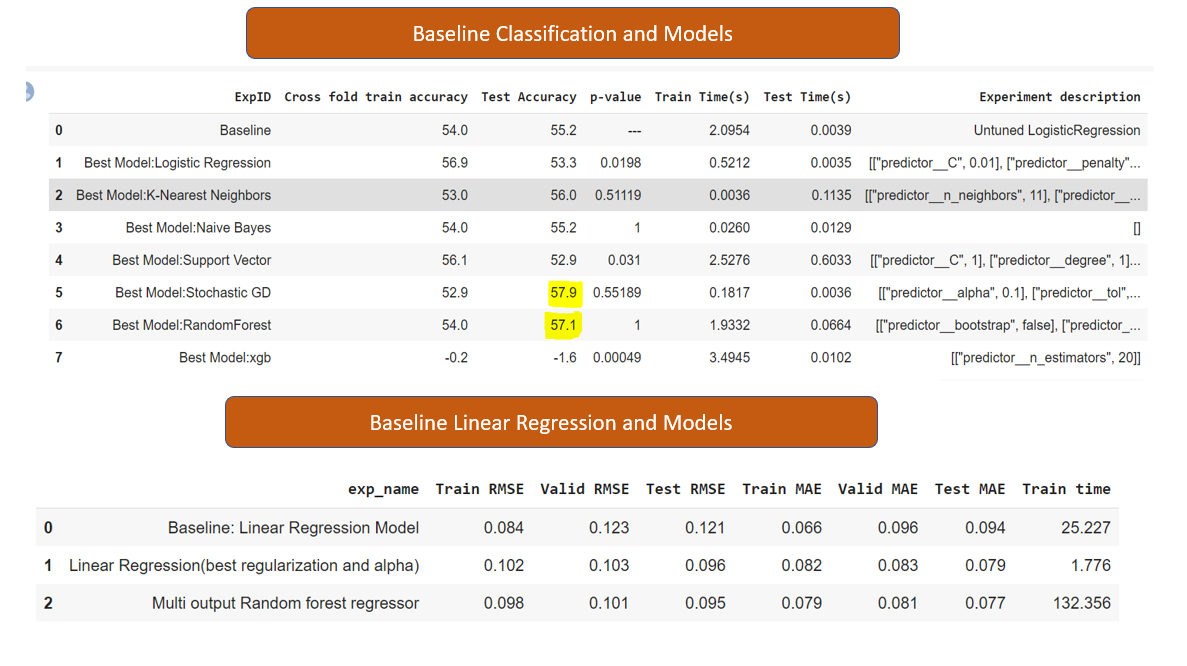

Phase 2: 

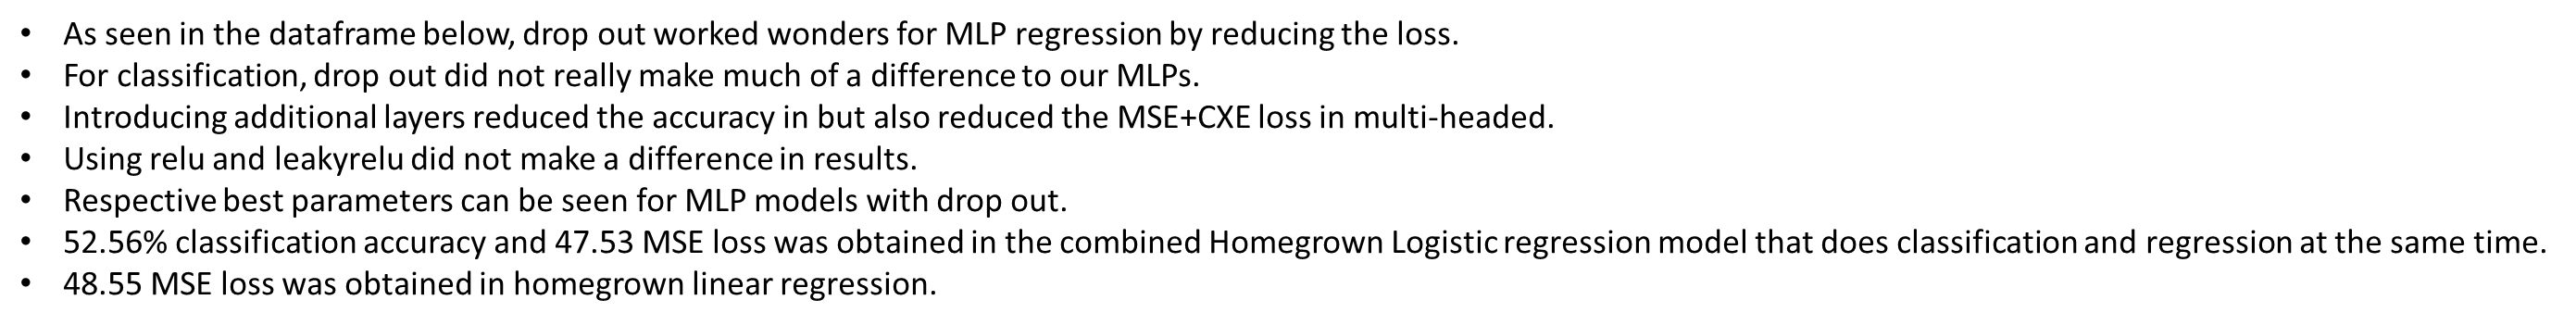

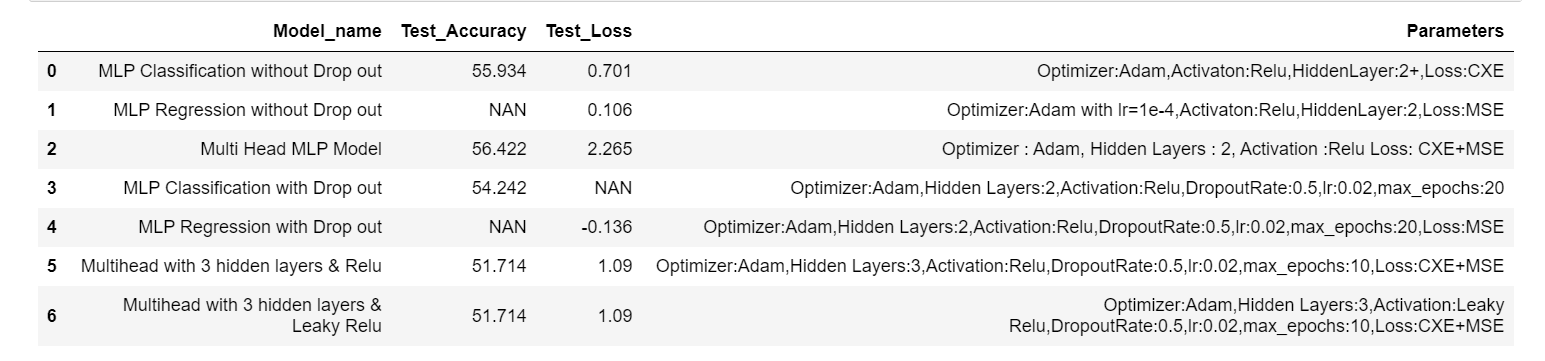

## Problems/Challenges Faced

* In homegrown method to implement both classification and regression at the same time, we had to come up with a way to use the same object class and functions for both. We solved this by debugging the fact that logistic regression with unnormalized distances is the same as linear regression making it easy to implement both classification and regression at the same time.
* A major problem we faced while designing our MLP was to alter our dataset in order for it to fit into the input layer of the MLP. This was resolved after we converted the data to float32 tensors.
* While creating the pipeline for MLPs respectively for regression and classification, we were unable to combine it with gridsearchCV due to its incompatibility with the Dataloader. This was resolved by using NeuralNetClassifier and NeuralNetRegressor which uses SliceDataset instead of Dataloader to iterate over our data. It was also easier to give parameters such as learning rate, batch size etc. 
* Due to a sampling bias present in our split dataset, the testing accuracy was at times higher than the training accuracy.
* In certain areas, data leakage was noticed. We avoided this by normalizing and scaling the training and testing data separately and not together. 


## Conclusions:

* In phase 1, we have focused on the SKLearn Baseline models for Logistic Regression, SGDClassifier to classify the images into cats and dogs and Linear Regression for marking the bounding boxes around the cats and dogs inside the image. 
* We have also implemented the Homegrown Logistic Regression and Homegrown Linear Regression to compare the results. 
* In phase 2, we re-showcase the homegrown implementation of logistic regression to do both classification and regression at the same time. 
* Adding on, we built 2 MLPs each for classification and regression with and without drop out exploring both Sequential as well as OOP API of PyTorch. 
* A multi-headed MLP was also implemented with 2 different outputs from the same neural net one for each of classification and regression trained with one set of weights using a combined loss of CXE+MSE. 
* Multiple experiments were conducted with respect to number of hidden layers, drop out, learning rate, number of epochs etc and the results were tabulated. 


## Next Phase:

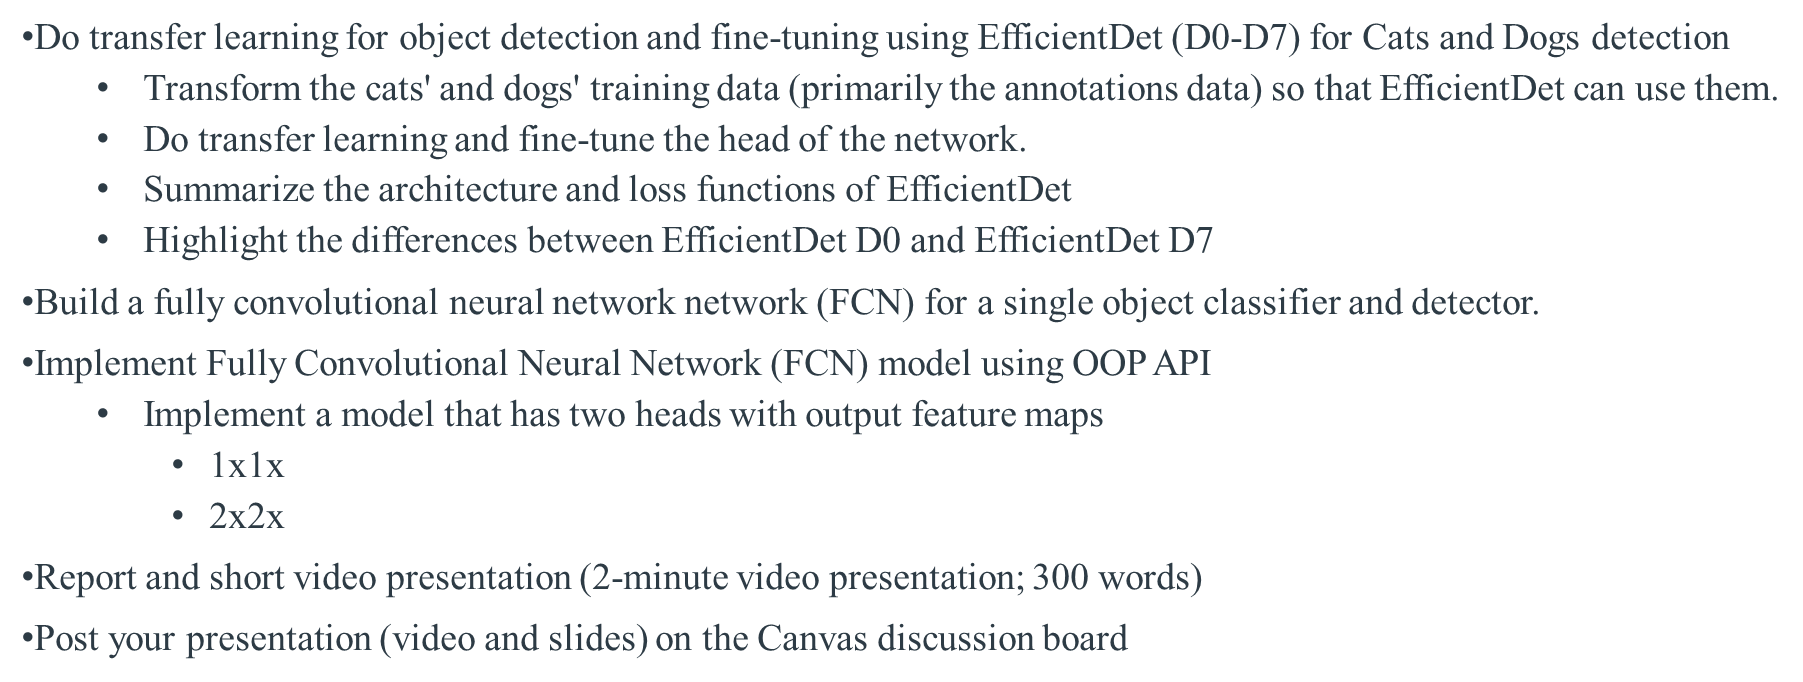

## TRANSFER LEARNING AND EFFICIENT DET:

In [ ]:
from collections import Counter
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
import tarfile
from tqdm.notebook import tqdm
import warnings

In [ ]:
def extract_tar(file, path):
    """
    function to extract tar.gz files to specified location
    
    Args:
        file (str): path where the file is located
        path (str): path where you want to extract
    """
    with tarfile.open(file) as tar:
        files_extracted = 0
        for member in tqdm(tar.getmembers()):
            if os.path.isfile(path + member.name[1:]):
                continue
            else:
                tar.extract(member, path)
                files_extracted += 1
        tar.close()
        if files_extracted < 3:
            print('Files already exist')